# Name : Ashutosh Kumar
Contact Details: Phone: +91-8904866645, Email: ashutoshind2017@outlook.com

## Objective of the problem: 
The objective of the problem is to predict the values of credit_amount variable as per serial number variable. Please view the sample submissions file for better understanding. The solution must be presented in the form of a csv with predicted values of the response variable credit_amount along with it’s corresponding serial number.
Evaluation Metric : Normalized root mean squared error. The score is calculated by (1-rmse/normalization factor)*100.

## Evaluation Criteria:
Root Mean Square Error (RMSE)
normalization_constant 100000


In [7]:
# Importing required python libraries:

import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt

# Make sure below version of seaborn is installed 
# !pip3 install seaborn==0.9.0
import seaborn as sns

# Make sure to use below version of scipy :
# !pip install scipy==1.2 --upgrade

#`import pandas_profiling as pf
import os
import sys

color = sns.color_palette()

import plotly.offline as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from itertools import product
from sklearn import ensemble
import xgboost as xgb
from xgboost.sklearn import XGBRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
#from scipy.misc import factorial

from statistics import *
from sklearn.ensemble import VotingClassifier

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Understanding , Cleaning and Preparing

In [8]:
# Importing the train, test dataset for the information of the client at the time of application and building the dataframe:

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [9]:
# Having first glance of current application data:
train_df.head()

serial number account_info  duration_month Loan Regularity Purpose  \
0              1       BRONZE               6  YES         NO     A40   
1              2       SILVER              48  YES        YES     A40   
2              3          NaN              12  YES         NO     A46   
3              4       BRONZE              42  YES        YES     A40   
4              5       BRONZE              24  YES         NO     A40   

   credit_amount savings_account  Saving Account employment_st    ...     \
0           1169             A65             NaN           A75    ...      
1           5951             A61            72.0           A73    ...      
2           2096             A61            68.0           A74    ...      
3           7882             A61            73.0           A74    ...      
4           4870             A61            52.0           A73    ...      

   resident_since  property_type age installment_type housing_type  \
0               4           A121  67             A143         A152   
1               2           A121  22             A143         A152   
2               3           A121  49             A143         A152   
3               4           A122  45             A143         A153   
4               4           A124  53             A143         A153   

   credits_no job_type  liables telephone foreigner  
0           2     A173        1      A192      A201  
1           1     A173        1      A191      A201  
2           1     A172        2      A191      A201  
3           1     A173        2      A191      A201  
4           2     A173        2      A191      A201  

[5 rows x 25 columns]

In [10]:
# Test data:
test_df.head()

serial number account_info  duration_month Loan Regularity Purpose  \
0              1          NaN              12  YES        YES     A40   
1              2       BRONZE              48  YES         NO     A40   
2              3         GOLD              24  YES        YES     A40   
3              4       SILVER              30  YES         NO     A49   
4              5       SILVER              27  YES        YES     A49   

  savings_account  Saving Account employment_st  Salary    ...      \
0             A63           517.0           A73    1134    ...       
1             A61            18.0           A75     783    ...       
2             A62           389.0           A75    1181    ...       
3             A62           326.0           A75     853    ...       
4             A61            16.0           A72     888    ...       

   resident_since property_type age installment_type  housing_type credits_no  \
0               4          A123  29             A143          A151          1   
1               4          A124  46             A143          A153          2   
2               2          A124  47             A143          A153          1   
3               2          A122  41             A142          A152          2   
4               1          A122  32             A143          A152          1   

   job_type liables telephone  foreigner  
0      A172       1      A191       A201  
1      A173       1      A192       A201  
2      A173       1      A192       A201  
3      A173       1      A191       A201  
4      A173       2      A192       A201  

[5 rows x 24 columns]

In [11]:
# Dropping the id feature as its just a unique number assigned to each data-point and will not impact the prediction of 
# credit_amount :

#Save the 'serial number' column
train_ID = train_df['serial number']
test_ID = test_df['serial number']

test_df.drop(columns=['serial number',], inplace=True)
train_df.drop(columns=['serial number',], inplace=True)

In [12]:
#check again the data size after dropping the 'Id' variable:
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape))


The train data size after dropping Id feature is : (700, 24) 
The test data size after dropping Id feature is : (300, 23) 


In [13]:
#Examining the data frame for the shape, datatypes, NUlls etc
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 24 columns):
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             700 non-null int64
telephone           

In [14]:
# Traditional descriptive statistics of the columns:
train_df.describe()

duration_month  credit_amount  Saving Account       Salary  investment  \
count      700.000000     700.000000      580.000000   700.000000  700.000000   
mean        20.652857    3182.331429      265.208621  1610.258571   39.365286   
std         12.279683    2725.319217      569.396113   784.923838    6.784642   
min          4.000000     276.000000        1.000000   700.000000   26.010000   
25%         12.000000    1350.750000       34.000000   953.500000   33.742500   
50%         18.000000    2253.000000       70.000000  1265.500000   39.570000   
75%         24.000000    3913.250000      137.500000  2198.250000   44.765000   
max         72.000000   15945.000000     3791.000000  3499.000000   53.610000   

       resident_since         age  credits_no     liables  
count      700.000000  700.000000  700.000000  700.000000  
mean         2.808571   35.322857    1.392857    1.148571  
std          1.114573   11.319842    0.572328    0.355920  
min          1.000000   19.000000    1.000000    1.000000  
25%          2.000000   27.000000    1.000000    1.000000  
50%          3.000000   33.000000    1.000000    1.000000  
75%          4.000000   41.000000    2.000000    1.000000  
max          4.000000   75.000000    4.000000    2.000000

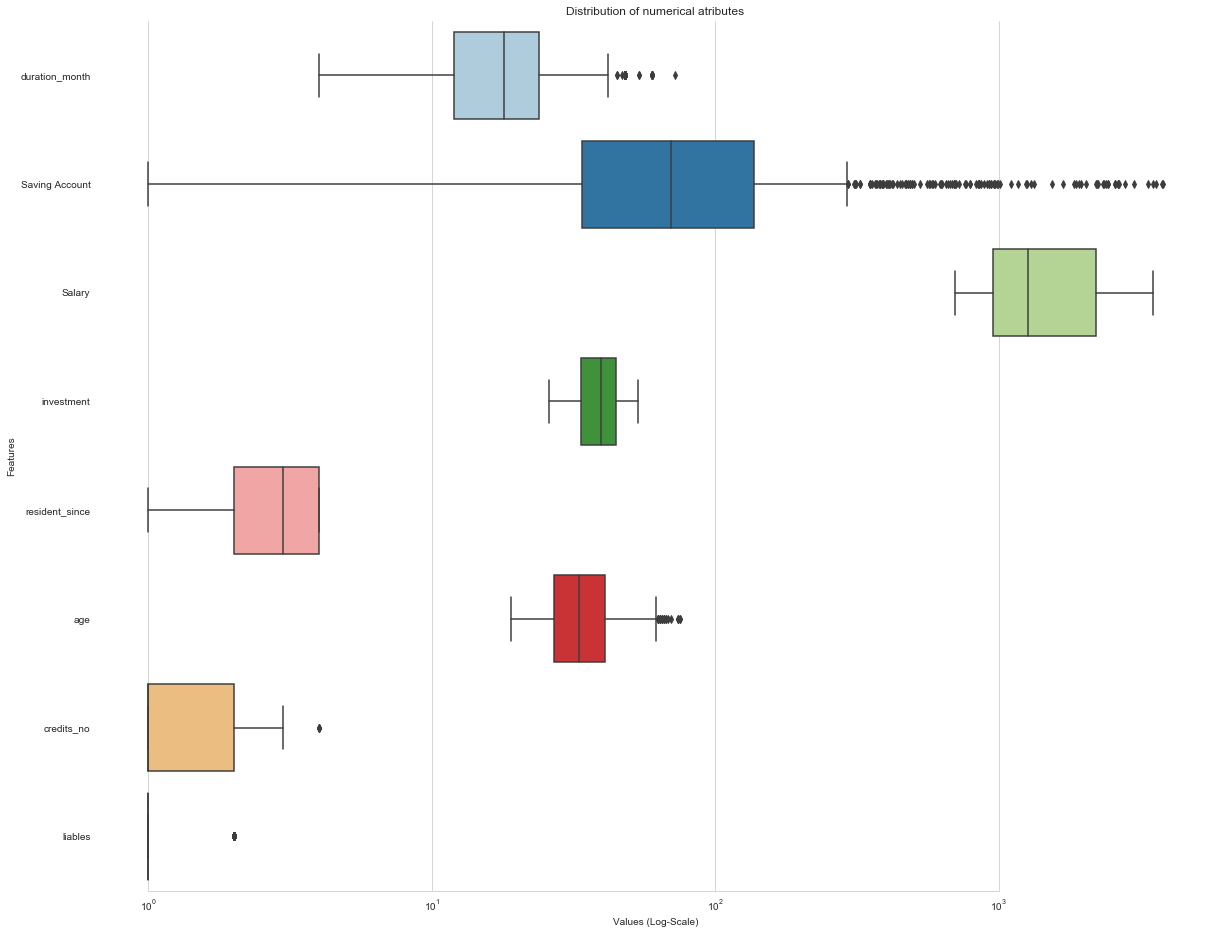

In [15]:
# Another look at the distribution of numerical attribute:

# Creating a list of dataframe columns which are numeric:
num_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

li_not_plot = ['serial number', 'credit_amount']
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]


# Boxplot for the numerical features against the target sales price variable:

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 16))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=train_df[li_plot_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True, left=True)

In [131]:
# So, there are few outliers.

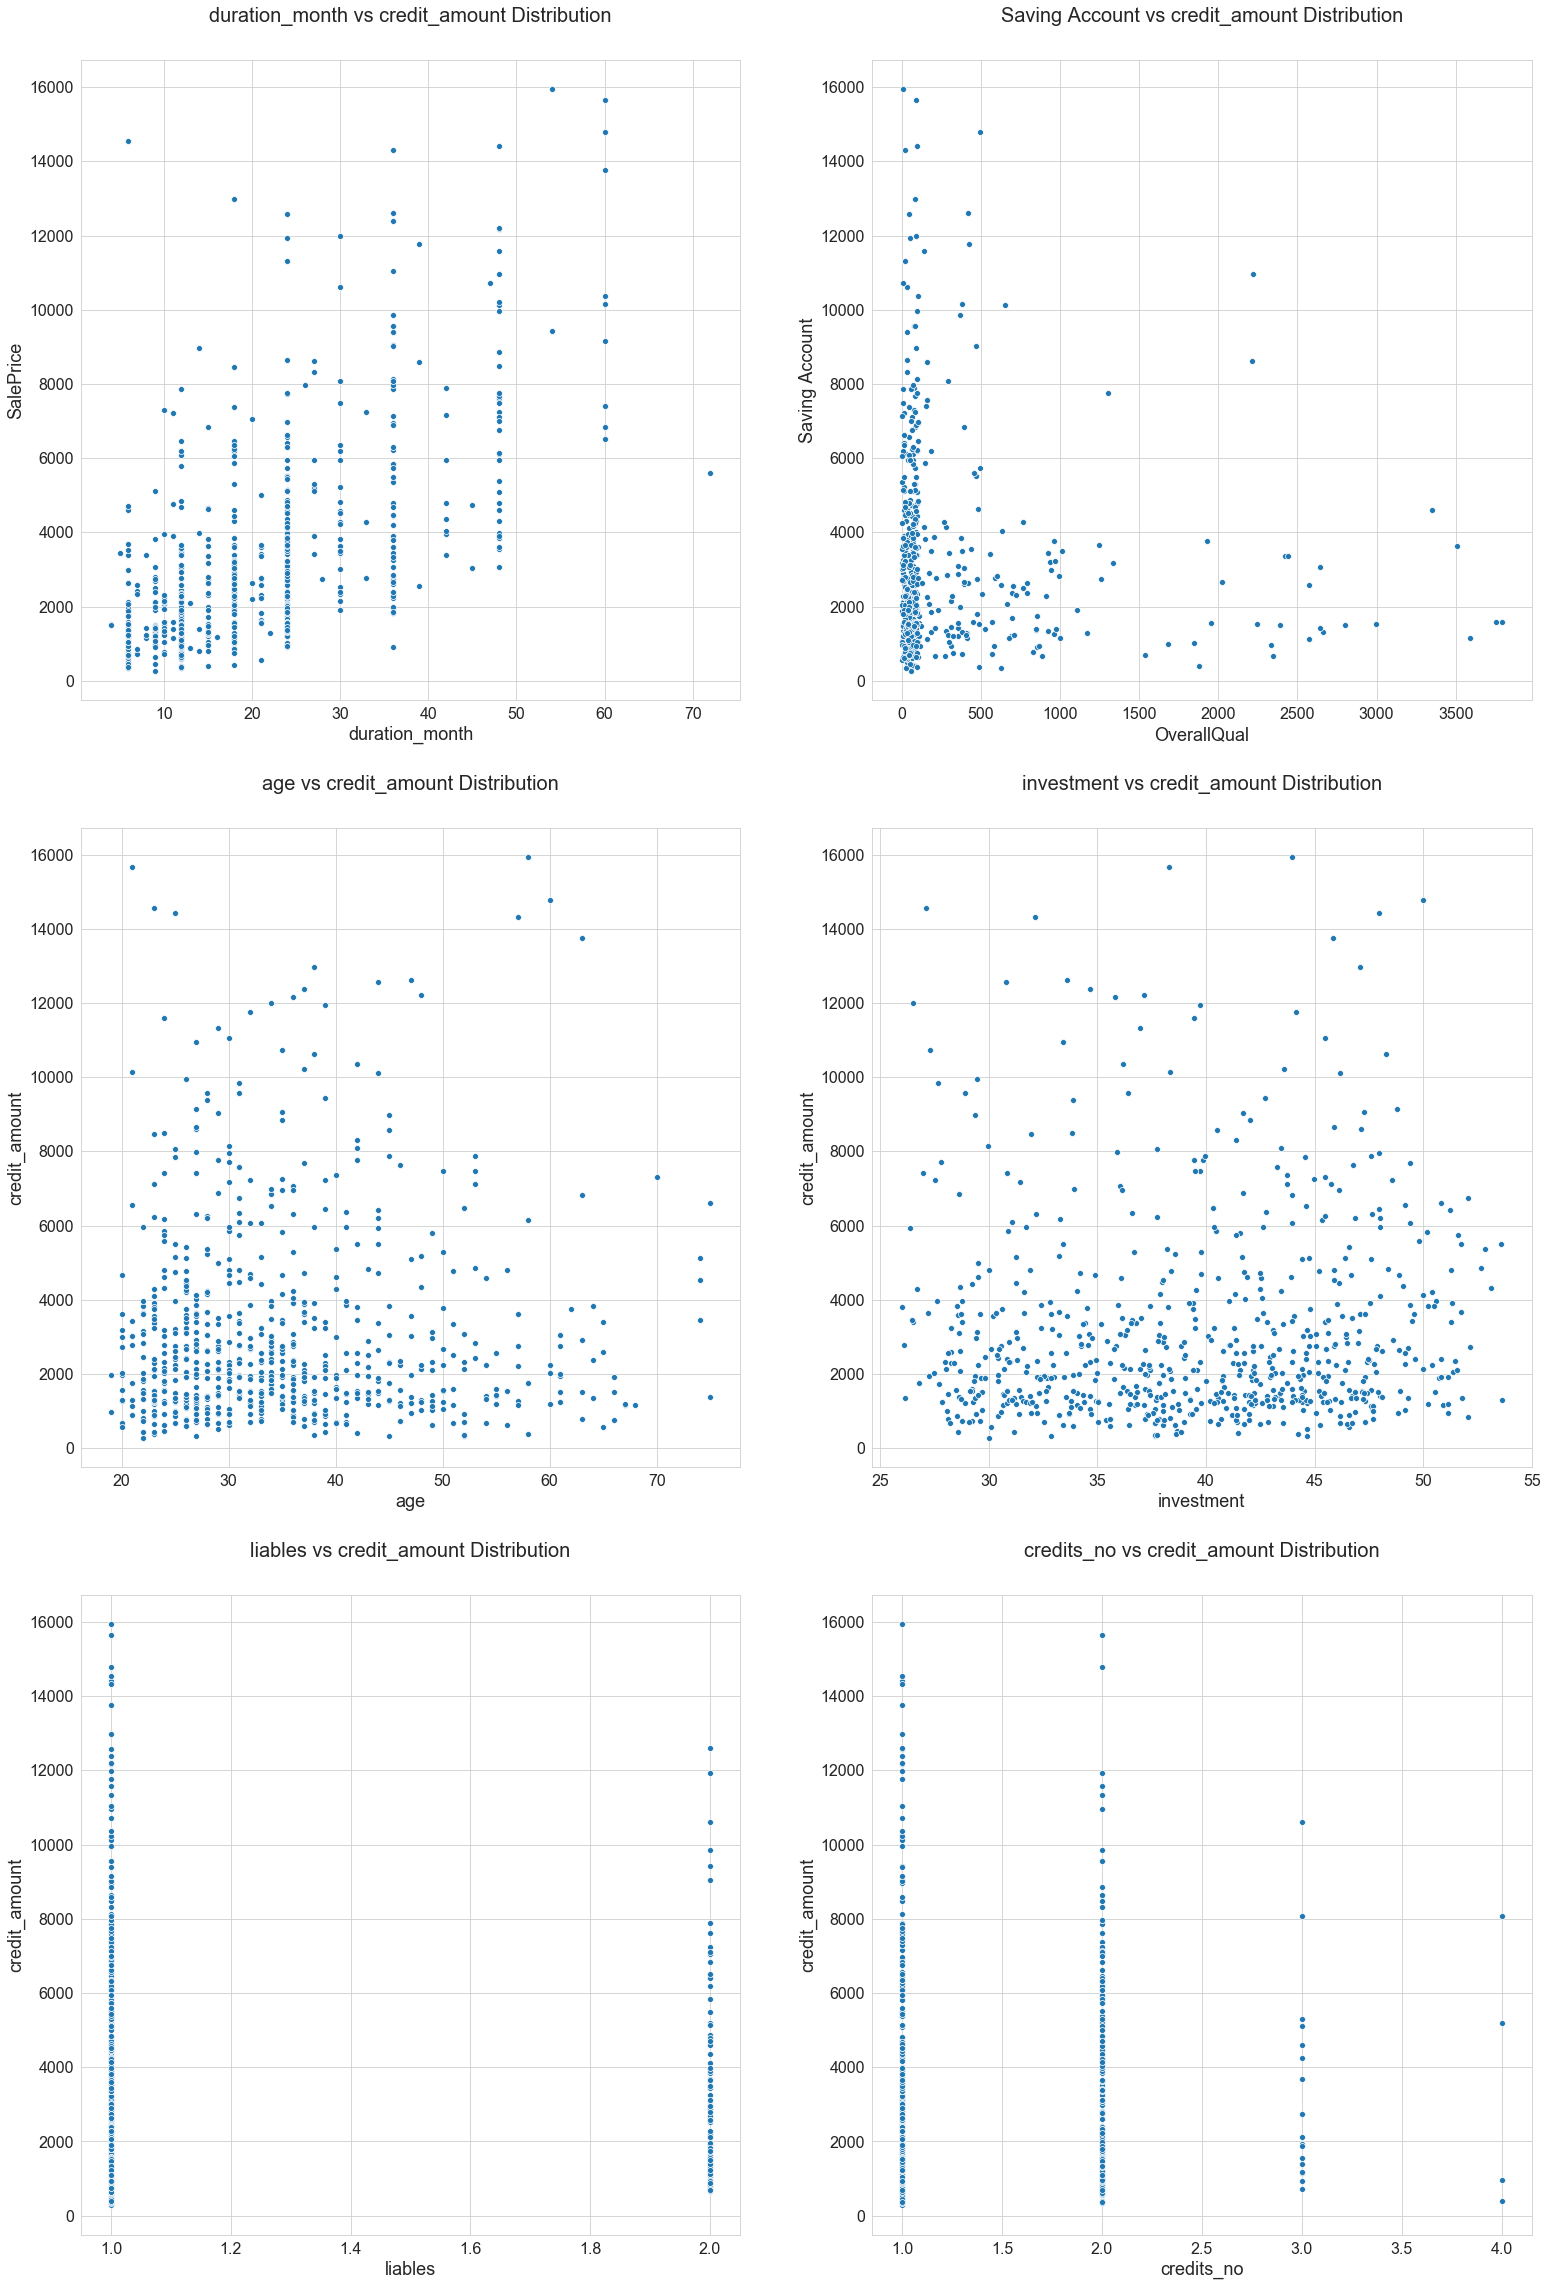

In [16]:
# Outlier Treatment:

# let's start with features like GrLivArea, TotalBsmtSF OverallQual having the outliers with the target
# variable


fig = plt.figure(figsize=(26, 40))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,2,1)
sns.scatterplot(x=train_df['duration_month'], y='credit_amount', palette='Blues_d', data=train_df)
plt.xlabel('duration_month', size=18)
plt.ylabel('SalePrice', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('duration_month vs credit_amount Distribution', size=20, y=1.05)

plt.subplot(3,2,2)
sns.scatterplot(x=train_df['Saving Account'], y='credit_amount', palette='Blues_d', data=train_df)
plt.xlabel('OverallQual', size=18)
plt.ylabel('Saving Account', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Saving Account vs credit_amount Distribution', size=20, y=1.05)

plt.subplot(3,2,3)
sns.scatterplot(x=train_df['age'], y='credit_amount', palette='Blues_d', data=train_df)
plt.xlabel('age', size=18)
plt.ylabel('credit_amount', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('age vs credit_amount Distribution', size=20, y=1.05)


plt.subplot(3,2,4)
sns.scatterplot(x=train_df['investment'], y='credit_amount', palette='Blues_d', data=train_df)
plt.xlabel('investment', size=18)
plt.ylabel('credit_amount', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('investment vs credit_amount Distribution', size=20, y=1.05)

plt.subplot(3,2,5)
sns.scatterplot(x=train_df['liables'], y='credit_amount', palette='Blues_d', data=train_df)
plt.xlabel('liables', size=18)
plt.ylabel('credit_amount', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('liables vs credit_amount Distribution', size=20, y=1.05)

plt.subplot(3,2,6)
sns.scatterplot(x=train_df['credits_no'], y='credit_amount', palette='Blues_d', data=train_df)
plt.xlabel('credits_no', size=18)
plt.ylabel('credit_amount', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('credits_no vs credit_amount Distribution', size=20, y=1.05)

plt.show()

In [133]:
# So, there are no clear outliers as such and values are in acceptable range.

In [17]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = train_df.corr()
cor

duration_month  credit_amount  Saving Account    Salary  \
duration_month        1.000000       0.634346       -0.044956 -0.050544   
credit_amount         0.634346       1.000000       -0.051729  0.272107   
Saving Account       -0.044956      -0.051729        1.000000 -0.033621   
Salary               -0.050544       0.272107       -0.033621  1.000000   
investment            0.056986       0.042112        0.033740  0.012201   
resident_since        0.026705       0.029258        0.027248 -0.044267   
age                  -0.047060       0.023802        0.072786 -0.088249   
credits_no           -0.014358       0.037022        0.016798 -0.019238   
liables              -0.015023       0.012145       -0.028740  0.083307   

                investment  resident_since       age  credits_no   liables  
duration_month    0.056986        0.026705 -0.047060   -0.014358 -0.015023  
credit_amount     0.042112        0.029258  0.023802    0.037022  0.012145  
Saving Account    0.033740        0.027248  0.072786    0.016798 -0.028740  
Salary            0.012201       -0.044267 -0.088249   -0.019238  0.083307  
investment        1.000000        0.050425  0.068886    0.052050  0.071413  
resident_since    0.050425        1.000000  0.273753    0.077693  0.071796  
age               0.068886        0.273753  1.000000    0.132760  0.126560  
credits_no        0.052050        0.077693  0.132760    1.000000  0.092303  
liables           0.071413        0.071796  0.126560    0.092303  1.000000

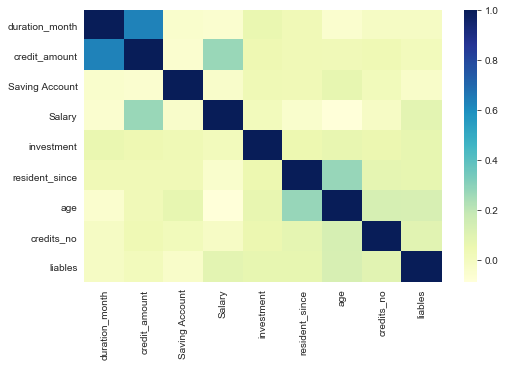

In [18]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(8,5))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()


In [19]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable credit_amount")

corr_initial = train_df.corr()['credit_amount']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["credit_amount"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['credit_amount'], ascending=False)
corr_initial2.head(15)

Most important features relative to target variable credit_amount


credit_amount
credit_amount        1.000000
duration_month       0.634346
Salary               0.272107
investment           0.042112
credits_no           0.037022
resident_since       0.029258
age                  0.023802
liables              0.012145
Saving Account      -0.051729

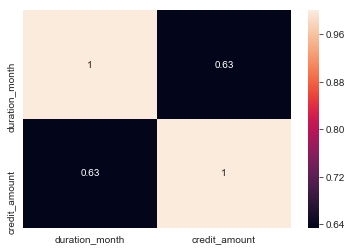

In [20]:
# Lets plot the heatmap again for only strong correlation (i.e. >0.6) with the target variable:

top_feature = cor.index[abs(cor['credit_amount']>0.6)]
plt.subplots(figsize=(6, 4))
top_corr = train_df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [21]:
# duration_month(duration of loan) seems to have strongest correlation with the target variable credit_amount

### Understanding the distribution of the target variable "credit_amount":

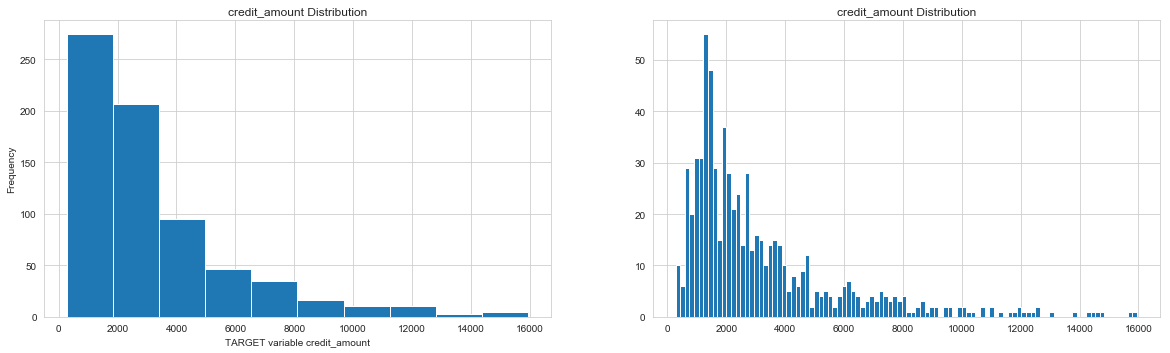

In [22]:
# Plotting the information for visualisation wrt to target variable in absolute terms:

# Since this column is only in the train-data we will be using the same:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
plt.title('credit_amount Distribution')
train_df['credit_amount'].astype(int).plot.hist();
plt.xlabel("TARGET variable credit_amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('credit_amount Distribution')
sns.set()
plt.hist(train_df['credit_amount'],bins=100)
plt.show()

In [25]:
# let's first concatenate the train and test data in the same dataframe:
# Now let's combine the test and train data to perform the EDA on the data-set :

ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train_initial = train_df.credit_amount.values
credit_df = pd.concat((train_df, test_df)).reset_index(drop=True)

In [26]:
credit_df.shape

(1000, 24)

In [27]:
# So 1000 records in train and 24 columns in dataset

In [28]:
# Identify the missing data:

#Finding number of NULLs for each column in dataset:
#df_train_data.isnull().sum(axis=0)

#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)
print(round(100*(credit_df.isnull().sum(axis=0)/len(credit_df.index)),2))

Gender               0.0
Loan                 0.0
Purpose              0.0
Regularity           0.0
Salary               0.0
Saving Account      18.3
Status               0.0
account_info        39.4
age                  0.0
credit_amount       30.0
credits_no           0.0
duration_month       0.0
employment_st        0.0
foreigner            0.0
gurantors            0.0
housing_type         0.0
installment_type     0.0
investment           0.0
job_type             0.0
liables              0.0
property_type        0.0
resident_since       0.0
savings_account      0.0
telephone            0.0
dtype: float64


In [29]:
# So, we have missing value for 2 columns out of 15.
# It is 39 % for account_info and 17.14 % for Saving Account, 30 % of credit_amount which is expected for the test data.

In [30]:
# Finding the datatypes of the columns:
print(credit_df.dtypes)

Gender               object
Loan                 object
Purpose              object
Regularity           object
Salary                int64
Saving Account      float64
Status               object
account_info         object
age                   int64
credit_amount       float64
credits_no            int64
duration_month        int64
employment_st        object
foreigner            object
gurantors            object
housing_type         object
installment_type     object
investment          float64
job_type             object
liables               int64
property_type        object
resident_since        int64
savings_account      object
telephone            object
dtype: object


In [31]:
# Number of each type of column
credit_df.dtypes.value_counts()

object     15
int64       6
float64     3
dtype: int64

In [148]:
# So, we have 15 categorical variable and 9 numerical variable here.

In [149]:
# Using built-in pandas profiling library for building inline and html report:

#For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:
#Essentials: type, unique values, missing values, Quantile statistics, Descriptive statistics, Most frequent values, Histogram, 
# Correlations highlightings etc:

# profile = pf.ProfileReport(credit_df)
# print(display(profile))

#Save the data filing Report to HTML file for future reference, this is in the currennt working directory:
# profile.to_file("Credit_Profile.html")


In [32]:
# Function to convert the data type to save memory usage by dataframe:

# df_application_data

def convert_types(df):  
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Float64 to float32
        if df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    print('Original memory usage (GB):', original_memory / 1e9 )
    print('New memory usage (GB):', new_memory / 1e9 )
            
    return df

convert_types(credit_df)

Original memory usage (GB): 0.00019208
New memory usage (GB): 0.00018008


Gender Loan Purpose Regularity  Salary  Saving Account    Status  \
0        M  YES     A40         NO     852             NaN  Umarried   
1        F  YES     A40        YES    2400            72.0  Divorced   
2        M  YES     A46         NO    2078            68.0  Umarried   
3        M  YES     A40        YES    2380            73.0  Umarried   
4        M  YES     A40         NO    1756            52.0  Umarried   
5        M  YES     A46        YES    2363             NaN  Umarried   
6        M  YES     A40        YES    1567           990.0  Umarried   
7        M  YES     A40        YES    2305            98.0  Umarried   
8        M  YES     A40        YES    1891          2641.0  Divorced   
9        M  YES     A40         NO     964            14.0   Married   
10       F  YES     A40        YES    1787            90.0  Divorced   
11       F  YES     A49        YES    1770            28.0  Divorced   
12       F  YES     A40        YES    2847            33.0  Divorced   
13       M  YES     A40         NO     781            33.0  Umarried   
14       F  YES     A40        YES    2165            64.0  Divorced   
15       F  YES     A40        YES     844           408.0  Divorced   
16       M  YES     A40         NO     760             NaN  Umarried   
17       M   NO     A49        YES    1888             NaN  Umarried   
18       F  YES     A40        YES     770            47.0  Divorced   
19       M  YES     A40        YES    1649           559.0  Umarried   
20       M  YES     A40         NO    1111            16.0  Umarried   
21       M  YES     A40        YES    2445           790.0  Umarried   
22       M  YES     A40         NO    3294            87.0  Umarried   
23       M  YES     A40         NO    1333           473.0  Umarried   
24       M  YES     A40         NO    2569             NaN   Married   
25       M  YES     A40        YES    3354            35.0  Umarried   
26       M   NO     A40        YES     714            76.0   Married   
27       F   NO     A40        YES    1382          1875.0  Divorced   
28       M  YES     A40        YES    1486            31.0  Umarried   
29       M  YES     A49         NO    1466            81.0  Umarried   
..     ...  ...     ...        ...     ...             ...       ...   
970      M  YES     A40        YES    1099           346.0  Umarried   
971      M  YES     A40        YES    3295            70.0  Umarried   
972      F   NO     A40        YES    2728            23.0  Divorced   
973      M  YES     A49        YES     887            31.0  Umarried   
974      F  YES     A40         NO     706            80.0  Divorced   
975      F  YES     A40        YES    1214           956.0  Divorced   
976      F  YES     A40        YES    1859            21.0  Divorced   
977      M  YES     A49         NO     912             NaN  Umarried   
978      M  YES     A40         NO    1045             4.0  Umarried   
979      M   NO     A40        YES    2158           455.0   Married   
980      M  YES     A40         NO    1943            42.0  Umarried   
981      M  YES     A49        YES    1718            60.0  Umarried   
982      F  YES     A40        YES    3140           205.0  Divorced   
983      M  YES     A40        YES    1825            70.0  Umarried   
984      M  YES     A40         NO    1800            19.0  Umarried   
985      F  YES     A40         NO    1191            61.0  Divorced   
986      M   NO     A49        YES    2028            26.0  Divorced   
987      F  YES     A40        YES    2227           258.0  Divorced   
988      M  YES     A40        YES     826            88.0  Umarried   
989      M  YES     A40         NO     840            15.0  Umarried   
990      M  YES     A46         NO    2369             NaN  Umarried   
991      M   NO     A40        YES     935           109.0  Umarried   
992      M  YES     A40        YES    2154             NaN   Married   
993      M  YES     A40        YES    1118  

In [33]:
# Converting from Y , N to boolean values
# Categorical features with Binary encode (0 or 1; two categories)

credit_df['Loan'] = credit_df['Loan'].map({'NO':0, 'YES':1})
credit_df['Regularity'] = credit_df['Regularity'].map({'NO':0, 'YES':1})

In [34]:
credit_df.head()

Gender  Loan Purpose  Regularity  Salary  Saving Account    Status  \
0      M     1     A40           0     852             NaN  Umarried   
1      F     1     A40           1    2400            72.0  Divorced   
2      M     1     A46           0    2078            68.0  Umarried   
3      M     1     A40           1    2380            73.0  Umarried   
4      M     1     A40           0    1756            52.0  Umarried   

  account_info  age  credit_amount    ...      gurantors  housing_type  \
0       BRONZE   67         1169.0    ...           A101          A152   
1       SILVER   22         5951.0    ...           A101          A152   
2          NaN   49         2096.0    ...           A101          A152   
3       BRONZE   45         7882.0    ...           A103          A153   
4       BRONZE   53         4870.0    ...           A101          A153   

  installment_type investment job_type liables property_type  resident_since  \
0             A143  34.080002     A173       1          A121               4   
1             A143  48.000000     A173       1          A121               2   
2             A143  41.560001     A172       2          A121               3   
3             A143  47.599998     A173       2          A122               4   
4             A143  52.680000     A173       2          A124               4   

  savings_account  telephone  
0             A65       A192  
1             A61       A191  
2             A61       A191  
3             A61       A191  
4             A61       A191  

[5 rows x 24 columns]

In [35]:
# creating a function to identify the missing data in dataset:

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [36]:
missing_data(credit_df).head(5)

Total  Percent
account_info       394     39.4
credit_amount      300     30.0
Saving Account     183     18.3
telephone            0      0.0
savings_account      0      0.0

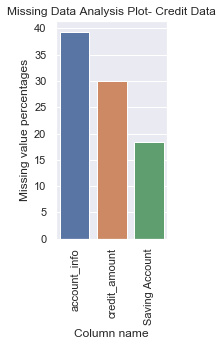

In [37]:
missing_data_df = (credit_df.isnull().sum() / len(credit_df)) * 100
missing_data_df = missing_data_df.drop(missing_data_df[missing_data_df == 0].index).sort_values(ascending=False)
#plt.title("Missing Values Visualisation")
plt.figure(figsize=(2, 4))
plt.xticks(rotation="90")
plt.title('Missing Data Analysis Plot- Credit Data')
plt.xlabel("Column name")
plt.ylabel("Missing value percentages")
sns.barplot(x=missing_data_df.index, y=missing_data_df)
plt.show()

In [38]:
# Converting the NULL,NA missing values etc. to numpy nan as we will use it for the data cleaning:
credit_df = credit_df.replace([' ','NULL','NA'],np.nan)

In [39]:
# Lets create functions to deal with null values :

# Looking at categorical values
def feature_exploration(column):
    return credit_df[column].value_counts()

# Imputing the missing values
def feature_imputation(column, value):
    credit_df.loc[credit_df[column].isnull(),column] = value

In [40]:
# Account_info field is important , and it has missing values, lets treat them :

# FireplaceQu:Categorized details of existing accounts of the individuals. The balance of money in account provided is stated
# by this variable, currently 39 % values are missing, lets see the details of the data spread:

feature_exploration('account_info')

BRONZE    274
SILVER    269
GOLD       63
Name: account_info, dtype: int64

In [41]:
# From the data , we can put the missing value for such account as DEFAULT_MISSING
feature_imputation('account_info', 'DEFAULT_MISSING')

In [42]:
# Saving Account : No info is available for this variable and around 17 % values are missing :

# Let's see statistical distribution of the same :

credit_df['Saving Account'].describe()

count     817.000000
mean      273.318237
std       595.970106
min         1.000000
25%        35.000000
50%        70.000000
75%       137.000000
max      3791.000000
Name: Saving Account, dtype: float64

In [43]:
# Imputing with zero :
feature_imputation('Saving Account',0)

In [44]:
missing_data(credit_df).head(5)

Total  Percent
credit_amount      300     30.0
telephone            0      0.0
savings_account      0      0.0
Loan                 0      0.0
Purpose              0      0.0

In [45]:
#assert that there are no missing values
#So, we have only null value for target for test-data set and its expected as we have to predict the same.b

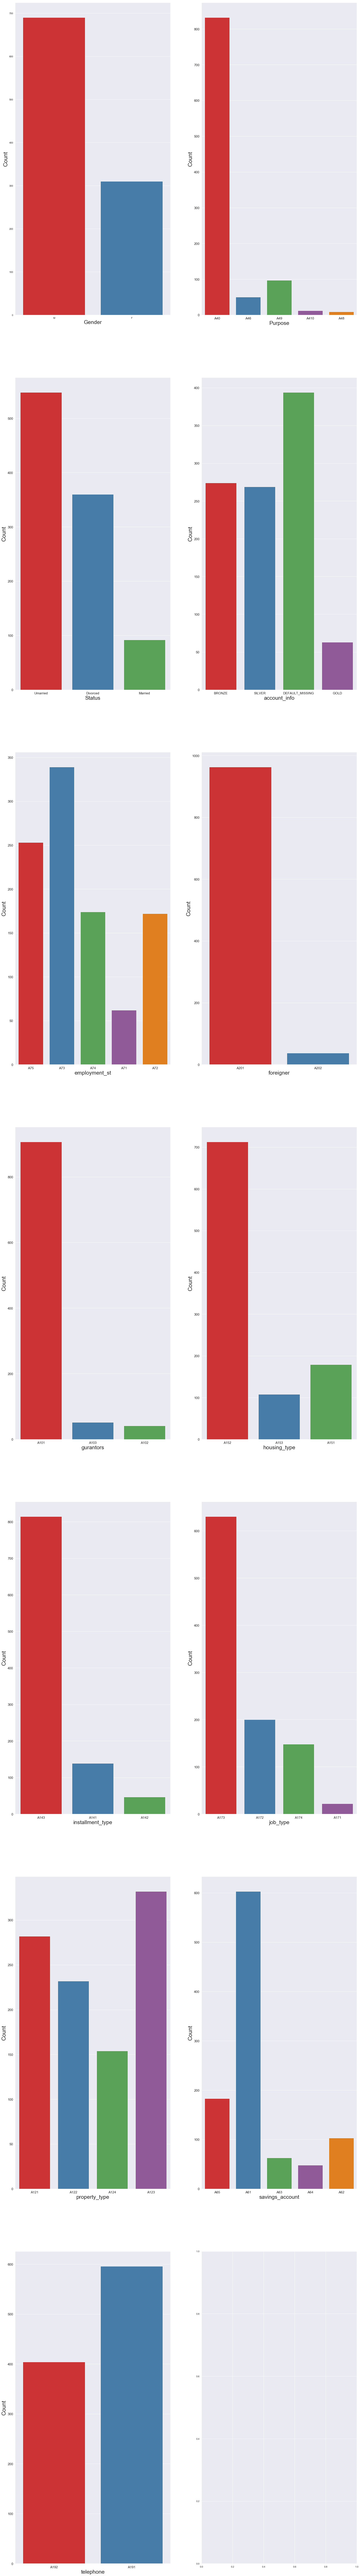

In [46]:
# Plot of the categorical features distribution:

credit_cat_var_list = credit_df.select_dtypes(exclude=[np.number]).columns.tolist()

fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(16, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(credit_cat_var_list, 1):    
    plt.subplot(7, 2, i)
    sns.set(font_scale = 1.4)
    sns.countplot(x=feature, data=credit_df, palette='Set1')
        
    plt.xlabel('{}'.format(feature), size=25)
    plt.ylabel('Count', size=26)
            
plt.show()


In [47]:
# Plot of relation between qualitative (categorical) variable and the target variable (SalePrice):

housing_cat_var = credit_df.select_dtypes(exclude=[np.number]).columns

# Creating boxplot with the target variable:        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(credit_df, id_vars=['credit_amount'], value_vars=housing_cat_var)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "credit_amount", color = 'husl')


In [48]:
# Examining the dataset imported:
print("Full credit_df size is : {}".format(credit_df.shape))

Full credit_df size is : (1000, 24)


In [167]:
# many statistical analyses require an assumption of normality, such as analysis of variance(ANOVA) test.So
# transformations are used to make data approximately normal. We will be using the transfromation for our use case.
# We will use transformation mechanism if needed later like BoxCox or Log Transformation

In [49]:
numeric_features = credit_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features

['Loan',
 'Regularity',
 'Salary',
 'Saving Account',
 'age',
 'credit_amount',
 'credits_no',
 'duration_month',
 'investment',
 'liables',
 'resident_since']

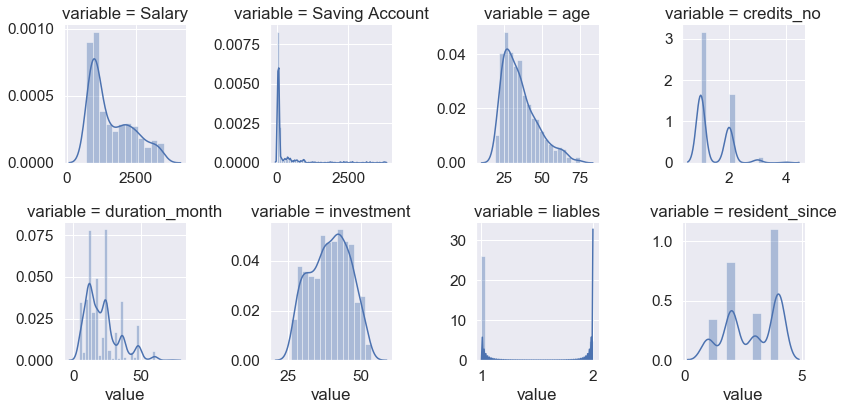

In [50]:
# Lets have a look at the feature variable distribution to understand if we need to perform variable transformation is needed
# for them or not:

# Selecting only numerical feature from the dataframe:
numeric_features = credit_df.select_dtypes(include=[np.number]).columns.tolist()

# Exclusing few binary features, target features as already transformed :
li_not_plot = ['Loan', 'Regularity','credit_amount']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

# Plotting the distribution of the quantative variables:
f = pd.melt(credit_df, value_vars=li_transform_num_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")


In [52]:
# Let's re-check the data-frame that we have:
credit_df.head()

Gender  Loan Purpose  Regularity  Salary  Saving Account    Status  \
0      M     1     A40           0     852             0.0  Umarried   
1      F     1     A40           1    2400            72.0  Divorced   
2      M     1     A46           0    2078            68.0  Umarried   
3      M     1     A40           1    2380            73.0  Umarried   
4      M     1     A40           0    1756            52.0  Umarried   

      account_info  age  credit_amount    ...      gurantors  housing_type  \
0           BRONZE   67         1169.0    ...           A101          A152   
1           SILVER   22         5951.0    ...           A101          A152   
2  DEFAULT_MISSING   49         2096.0    ...           A101          A152   
3           BRONZE   45         7882.0    ...           A103          A153   
4           BRONZE   53         4870.0    ...           A101          A153   

  installment_type investment job_type liables property_type  resident_since  \
0             A143  34.080002     A173       1          A121               4   
1             A143  48.000000     A173       1          A121               2   
2             A143  41.560001     A172       2          A121               3   
3             A143  47.599998     A173       2          A122               4   
4             A143  52.680000     A173       2          A124               4   

  savings_account  telephone  
0             A65       A192  
1             A61       A191  
2             A61       A191  
3             A61       A191  
4             A61       A191  

[5 rows x 24 columns]

In [53]:
# Creating copy of the house pricing data-frame for performing the multiple linear regressions, lasso and ridge etc 

credit_df_mlr = credit_df
credit_df_ridge = credit_df
credit_df_lasso = credit_df

In [54]:
# The data is ready now for the modelling steps. NULL values are removed

# Step 2: Model Building :

### 2. 1 : Multiple Linear Regression model using RFE:

In [55]:
# So we have the required data in the below dataframe:
credit_df_mlr.shape


(1000, 24)

In [56]:
# Examining the dataframes(dataset) data:
credit_df_mlr.head()

Gender  Loan Purpose  Regularity  Salary  Saving Account    Status  \
0      M     1     A40           0     852             0.0  Umarried   
1      F     1     A40           1    2400            72.0  Divorced   
2      M     1     A46           0    2078            68.0  Umarried   
3      M     1     A40           1    2380            73.0  Umarried   
4      M     1     A40           0    1756            52.0  Umarried   

      account_info  age  credit_amount    ...      gurantors  housing_type  \
0           BRONZE   67         1169.0    ...           A101          A152   
1           SILVER   22         5951.0    ...           A101          A152   
2  DEFAULT_MISSING   49         2096.0    ...           A101          A152   
3           BRONZE   45         7882.0    ...           A103          A153   
4           BRONZE   53         4870.0    ...           A101          A153   

  installment_type investment job_type liables property_type  resident_since  \
0             A143  34.080002     A173       1          A121               4   
1             A143  48.000000     A173       1          A121               2   
2             A143  41.560001     A172       2          A121               3   
3             A143  47.599998     A173       2          A122               4   
4             A143  52.680000     A173       2          A124               4   

  savings_account  telephone  
0             A65       A192  
1             A61       A191  
2             A61       A191  
3             A61       A191  
4             A61       A191  

[5 rows x 24 columns]

In [57]:
# creating dummy variables for categorical variables

# subset all categorical variables
credit_df_cat = credit_df_mlr.select_dtypes(include=['object'])
credit_df_cat.head()


Gender Purpose    Status     account_info employment_st foreigner gurantors  \
0      M     A40  Umarried           BRONZE           A75      A201      A101   
1      F     A40  Divorced           SILVER           A73      A201      A101   
2      M     A46  Umarried  DEFAULT_MISSING           A74      A201      A101   
3      M     A40  Umarried           BRONZE           A74      A201      A103   
4      M     A40  Umarried           BRONZE           A73      A201      A101   

  housing_type installment_type job_type property_type savings_account  \
0         A152             A143     A173          A121             A65   
1         A152             A143     A173          A121             A61   
2         A152             A143     A172          A121             A61   
3         A153             A143     A173          A122             A61   
4         A153             A143     A173          A124             A61   

  telephone  
0      A192  
1      A191  
2      A191  
3      A191  
4      A191

In [58]:
# convert into dummies:

credit_dummies = pd.get_dummies(credit_df_cat, drop_first=True)
credit_dummies.head()

Gender_M  Purpose_A410  Purpose_A46  Purpose_A48  Purpose_A49  \
0         1             0            0            0            0   
1         0             0            0            0            0   
2         1             0            1            0            0   
3         1             0            0            0            0   
4         1             0            0            0            0   

   Status_Married  Status_Umarried  account_info_DEFAULT_MISSING  \
0               0                1                             0   
1               0                0                             0   
2               0                1                             1   
3               0                1                             0   
4               0                1                             0   

   account_info_GOLD  account_info_SILVER       ...        job_type_A173  \
0                  0                    0       ...                    1   
1                  0                    1       ...                    1   
2                  0                    0       ...                    0   
3                  0                    0       ...                    1   
4                  0                    0       ...                    1   

   job_type_A174  property_type_A122  property_type_A123  property_type_A124  \
0              0                   0                   0                   0   
1              0                   0                   0                   0   
2              0                   0                   0                   0   
3              0                   1                   0                   0   
4              0                   0                   0                   1   

   savings_account_A62  savings_account_A63  savings_account_A64  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   savings_account_A65  telephone_A192  
0                    1               1  
1                    0               0  
2                    0               0  
3                    0               0  
4                    0               0  

[5 rows x 32 columns]

In [59]:
# drop categorical variables 
credit_df_mlr = credit_df_mlr.drop(list(credit_df_cat.columns), axis=1)

In [60]:
# concat dummy variables:
credit_df_mlr = pd.concat([credit_df_mlr, credit_dummies], axis=1)

In [61]:
# Examining the encoded dataframes(dataset) data:

credit_df_mlr.head()

Loan  Regularity  Salary  Saving Account  age  credit_amount  credits_no  \
0     1           0     852             0.0   67         1169.0           2   
1     1           1    2400            72.0   22         5951.0           1   
2     1           0    2078            68.0   49         2096.0           1   
3     1           1    2380            73.0   45         7882.0           1   
4     1           0    1756            52.0   53         4870.0           2   

   duration_month  investment  liables       ...        job_type_A173  \
0               6   34.080002        1       ...                    1   
1              48   48.000000        1       ...                    1   
2              12   41.560001        2       ...                    0   
3              42   47.599998        2       ...                    1   
4              24   52.680000        2       ...                    1   

   job_type_A174  property_type_A122  property_type_A123  property_type_A124  \
0              0                   0                   0                   0   
1              0                   0                   0                   0   
2              0                   0                   0                   0   
3              0                   1                   0                   0   
4              0                   0                   0                   1   

   savings_account_A62  savings_account_A63  savings_account_A64  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   savings_account_A65  telephone_A192  
0                    1               1  
1                    0               0  
2                    0               0  
3                    0               0  
4                    0               0  

[5 rows x 43 columns]

In [62]:
# Since all the variables are now numerical, we can proceed with Splitting the first step in ML:

# Splitting the Data into Training and Testing Sets:
#from sklearn.model_selection import train_test_split

train = credit_df_mlr[:ntrain]
test = credit_df_mlr[ntrain:]

In [63]:
# Examining the training dataframes(dataset) data and info:
train.shape

(700, 43)

In [64]:
# Examining the test dataframes(dataset) data and info:
test.shape

(300, 43)

In [65]:
test.head()

Loan  Regularity  Salary  Saving Account  age  credit_amount  credits_no  \
700     1           1    1134           517.0   29            NaN           1   
701     1           0     783            18.0   46            NaN           2   
702     1           1    1181           389.0   47            NaN           1   
703     1           0     853           326.0   41            NaN           2   
704     1           1     888            16.0   32            NaN           1   

     duration_month  investment  liables       ...        job_type_A173  \
700              12   45.360001        1       ...                    0   
701              48   31.320000        1       ...                    1   
702              24   47.240002        1       ...                    1   
703              30   34.119999        1       ...                    1   
704              27   35.520000        2       ...                    1   

     job_type_A174  property_type_A122  property_type_A123  \
700              0                   0                   1   
701              0                   0                   0   
702              0                   0                   0   
703              0                   1                   0   
704              0                   1                   0   

     property_type_A124  savings_account_A62  savings_account_A63  \
700                   0                    0                    1   
701                   1                    0                    0   
702                   1                    1                    0   
703                   0                    1                    0   
704                   0                    0                    0   

     savings_account_A64  savings_account_A65  telephone_A192  
700                    0                    0               0  
701                    0                    0               1  
702                    0                    0               1  
703                    0                    0               0  
704                    0                    0               1  

[5 rows x 43 columns]

In [66]:
# Scaling the test data and training data using the standard scalar:
# Apply scaler() to all the columns except the 'dummy' variables, 'yes-no' and unordered categorical columns:

# Instantiate the scaler:
# Also, using the Robust Scaler as data in not normalised and this scaler will take care of the outliers as well :
scaler = RobustScaler()

# apply scaler() to all the numeric columns:
num_vars = ['duration_month','Saving Account','Salary','investment','resident_since','age','credits_no','liables']

train[num_vars] = scaler.fit_transform(train[num_vars])
test[num_vars] = scaler.transform(test[num_vars]) 


train.columns

Index(['Loan', 'Regularity', 'Salary', 'Saving Account', 'age',
       'credit_amount', 'credits_no', 'duration_month', 'investment',
       'liables', 'resident_since', 'Gender_M', 'Purpose_A410', 'Purpose_A46',
       'Purpose_A48', 'Purpose_A49', 'Status_Married', 'Status_Umarried',
       'account_info_DEFAULT_MISSING', 'account_info_GOLD',
       'account_info_SILVER', 'employment_st_A72', 'employment_st_A73',
       'employment_st_A74', 'employment_st_A75', 'foreigner_A202',
       'gurantors_A102', 'gurantors_A103', 'housing_type_A152',
       'housing_type_A153', 'installment_type_A142', 'installment_type_A143',
       'job_type_A172', 'job_type_A173', 'job_type_A174', 'property_type_A122',
       'property_type_A123', 'property_type_A124', 'savings_account_A62',
       'savings_account_A63', 'savings_account_A64', 'savings_account_A65',
       'telephone_A192'],
      dtype='object')

In [67]:
# Dividing data into X and y variables for model building:

y_train = train.pop('credit_amount')
X_train = train

In [68]:
# Using Recursive Feature Elimination (RFE) of scikilt learn library to perform automated course feature selection:

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE and taking top 30 feature for our model building:
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)

In [69]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Loan', True, 1),
 ('Regularity', True, 1),
 ('Salary', True, 1),
 ('Saving Account', False, 13),
 ('age', False, 10),
 ('credits_no', False, 4),
 ('duration_month', True, 1),
 ('investment', False, 8),
 ('liables', True, 1),
 ('resident_since', False, 6),
 ('Gender_M', True, 1),
 ('Purpose_A410', True, 1),
 ('Purpose_A46', True, 1),
 ('Purpose_A48', True, 1),
 ('Purpose_A49', False, 12),
 ('Status_Married', True, 1),
 ('Status_Umarried', True, 1),
 ('account_info_DEFAULT_MISSING', True, 1),
 ('account_info_GOLD', True, 1),
 ('account_info_SILVER', True, 1),
 ('employment_st_A72', True, 1),
 ('employment_st_A73', False, 7),
 ('employment_st_A74', False, 2),
 ('employment_st_A75', True, 1),
 ('foreigner_A202', False, 5),
 ('gurantors_A102', True, 1),
 ('gurantors_A103', True, 1),
 ('housing_type_A152', True, 1),
 ('housing_type_A153', False, 3),
 ('installment_type_A142', False, 9),
 ('installment_type_A143', True, 1),
 ('job_type_A172', True, 1),
 ('job_type_A173', True, 1),
 ('job_t

In [70]:
# Columns significant according to RFC:
col = X_train.columns[rfe.support_]
col

Index(['Loan', 'Regularity', 'Salary', 'duration_month', 'liables', 'Gender_M',
       'Purpose_A410', 'Purpose_A46', 'Purpose_A48', 'Status_Married',
       'Status_Umarried', 'account_info_DEFAULT_MISSING', 'account_info_GOLD',
       'account_info_SILVER', 'employment_st_A72', 'employment_st_A75',
       'gurantors_A102', 'gurantors_A103', 'housing_type_A152',
       'installment_type_A143', 'job_type_A172', 'job_type_A173',
       'job_type_A174', 'property_type_A122', 'property_type_A123',
       'property_type_A124', 'savings_account_A63', 'savings_account_A64',
       'savings_account_A65', 'telephone_A192'],
      dtype='object')

In [71]:
# Building model using statsmodel, for the detailed statistics:

# Creating X_test dataframe with RFE selected variables:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

Loan  Regularity    Salary  duration_month  liables  Gender_M  \
0     1           0 -0.332195            -1.0      0.0         1   
1     1           1  0.911428             2.5      0.0         0   
2     1           0  0.652742            -0.5      1.0         1   
3     1           1  0.895361             2.0      1.0         1   
4     1           0  0.394055             0.5      1.0         1   

   Purpose_A410  Purpose_A46  Purpose_A48  Status_Married       ...        \
0             0            0            0               0       ...         
1             0            0            0               0       ...         
2             0            1            0               0       ...         
3             0            0            0               0       ...         
4             0            0            0               0       ...         

   job_type_A172  job_type_A173  job_type_A174  property_type_A122  \
0              0              1              0                   0   
1              0              1              0                   0   
2              1              0              0                   0   
3              0              1              0                   1   
4              0              1              0                   0   

   property_type_A123  property_type_A124  savings_account_A63  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   
3                   0                   0                    0   
4                   0                   1                    0   

   savings_account_A64  savings_account_A65  telephone_A192  
0                    0                    1               1  
1                    0                    0               0  
2                    0                    0               0  
3                    0                    0               0  
4                    0                    0               0  

[5 rows x 30 columns]

In [72]:
# Model1:

#Build a linear model for all the columns 

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

#X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     34.44
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          6.95e-115
Time:                        20:58:59   Log-Likelihood:                -6203.1
No. Observations:                 700   AIC:                         1.247e+04
Df Residuals:                     669   BIC:                         1.261e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [73]:
# Checking VIF of model1:

#Calculating the Variance Inflation Factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
5                       Gender_M  17.15
21                 job_type_A173  14.72
10               Status_Umarried  12.97
0                           Loan  12.41
19         installment_type_A143   5.67
20                 job_type_A172   4.95
18             housing_type_A152   4.80
22                 job_type_A174   4.63
9                 Status_Married   2.99
11  account_info_DEFAULT_MISSING   2.79
1                     Regularity   2.78
24            property_type_A123   2.44
25            property_type_A124   2.29
13           account_info_SILVER   2.18
29                telephone_A192   2.07
23            property_type_A122   1.87
15             employment_st_A75   1.58
14             employment_st_A72   1.39
4                        liables   1.39
28           savings_account_A65   1.33
12             account_info_GOLD   1.28
2                         Salary   1.28
3                 duration_month   1.21
17                gurantors_A103   1.15
26           savings_account_A63   1.15
6                   Purpose_A410   1.13
7                    Purpose_A46   1.12
16                gurantors_A102   1.10
27           savings_account_A64   1.10
8                    Purpose_A48   1.08

In [74]:
# job_type_A173 has high p-value 0.680 and high VIF of 14.72 , lets remove the same 

#X = X.drop(["Purpose_A410"], axis = 1)
X = X_train_rfe.drop(["job_type_A173"], axis = 1)

In [75]:
# Model 2:

X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     35.67
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.25e-115
Time:                        20:59:03   Log-Likelihood:                -6203.2
No. Observations:                 700   AIC:                         1.247e+04
Df Residuals:                     670   BIC:                         1.260e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [76]:
# Checking VIF of model2:

#Calculating the Variance Inflation Factor
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5                       Gender_M  16.93
10               Status_Umarried  12.96
0                           Loan   9.84
19         installment_type_A143   5.36
18             housing_type_A152   4.45
9                 Status_Married   2.99
11  account_info_DEFAULT_MISSING   2.66
1                     Regularity   2.49
23            property_type_A123   2.30
24            property_type_A124   2.14
13           account_info_SILVER   2.12
28                telephone_A192   2.06
22            property_type_A122   1.79
15             employment_st_A75   1.57
21                 job_type_A174   1.51
20                 job_type_A172   1.40
4                        liables   1.38
14             employment_st_A72   1.37
27           savings_account_A65   1.33
12             account_info_GOLD   1.28
2                         Salary   1.27
3                 duration_month   1.21
25           savings_account_A63   1.15
17                gurantors_A103   1.14
6                   Purpose_A410   1.13
7                    Purpose_A46   1.12
16                gurantors_A102   1.10
26           savings_account_A64   1.10
8                    Purpose_A48   1.08

In [77]:
# Status_Umarried has high p-value of 0.301 and high VIF of 12.96, lets remove it :

X = X.drop(["Status_Umarried"], axis = 1)


In [78]:
# Model 3:

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     36.90
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          3.44e-116
Time:                        20:59:06   Log-Likelihood:                -6203.8
No. Observations:                 700   AIC:                         1.247e+04
Df Residuals:                     671   BIC:                         1.260e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [79]:
# Checking VIF of model3:

#Calculating the Variance Inflation Factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0                           Loan  9.84
18         installment_type_A143  5.36
17             housing_type_A152  4.45
5                       Gender_M  3.85
10  account_info_DEFAULT_MISSING  2.64
1                     Regularity  2.49
22            property_type_A123  2.30
23            property_type_A124  2.13
12           account_info_SILVER  2.12
27                telephone_A192  2.06
21            property_type_A122  1.79
14             employment_st_A75  1.56
20                 job_type_A174  1.51
19                 job_type_A172  1.40
4                        liables  1.37
13             employment_st_A72  1.37
26           savings_account_A65  1.33
9                 Status_Married  1.31
11             account_info_GOLD  1.27
2                         Salary  1.26
3                 duration_month  1.21
24           savings_account_A63  1.15
16                gurantors_A103  1.14
6                   Purpose_A410  1.13
7                    Purpose_A46  1.12
15                gurantors_A102  1.10
25           savings_account_A64  1.10
8                    Purpose_A48  1.08

In [80]:
# housing_type_A152 has high VIF of 4.45 and high pval of 0.159 , lets remove it :

X = X.drop(["housing_type_A152"], axis = 1)

In [81]:
# Model 4:

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     38.14
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.45e-116
Time:                        20:59:09   Log-Likelihood:                -6204.8
No. Observations:                 700   AIC:                         1.247e+04
Df Residuals:                     672   BIC:                         1.259e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [82]:
# Checking VIF of model4:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                           Loan  9.25
17         installment_type_A143  5.35
5                       Gender_M  3.65
10  account_info_DEFAULT_MISSING  2.54
1                     Regularity  2.46
21            property_type_A123  2.27
12           account_info_SILVER  2.07
26                telephone_A192  2.06
22            property_type_A124  1.86
20            property_type_A122  1.77
14             employment_st_A75  1.56
19                 job_type_A174  1.51
18                 job_type_A172  1.39
13             employment_st_A72  1.37
4                        liables  1.37
25           savings_account_A65  1.33
9                 Status_Married  1.30
11             account_info_GOLD  1.26
2                         Salary  1.26
3                 duration_month  1.21
23           savings_account_A63  1.15
16                gurantors_A103  1.14
6                   Purpose_A410  1.12
7                    Purpose_A46  1.12
15                gurantors_A102  1.10
24           savings_account_A64  1.10
8                    Purpose_A48  1.07

In [83]:
# installment_type_A143 has high VIF of 5.35 and p-val of 0.377, lets remove it :

X = X.drop(["installment_type_A143"], axis = 1)

In [84]:
# Model 5:

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     39.58
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          3.33e-117
Time:                        20:59:13   Log-Likelihood:                -6205.2
No. Observations:                 700   AIC:                         1.246e+04
Df Residuals:                     673   BIC:                         1.259e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [85]:
# Checking VIF of model5:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                           Loan  6.81
5                       Gender_M  3.63
10  account_info_DEFAULT_MISSING  2.53
1                     Regularity  2.40
20            property_type_A123  2.26
12           account_info_SILVER  2.07
25                telephone_A192  2.06
21            property_type_A124  1.86
19            property_type_A122  1.76
14             employment_st_A75  1.56
18                 job_type_A174  1.51
17                 job_type_A172  1.39
13             employment_st_A72  1.37
4                        liables  1.36
24           savings_account_A65  1.33
9                 Status_Married  1.30
2                         Salary  1.26
11             account_info_GOLD  1.26
3                 duration_month  1.21
22           savings_account_A63  1.15
16                gurantors_A103  1.14
7                    Purpose_A46  1.12
6                   Purpose_A410  1.11
15                gurantors_A102  1.10
23           savings_account_A64  1.10
8                    Purpose_A48  1.07

In [86]:
# account_info_DEFAULT_MISSING has high p-value 0.558 and VIF 2.53, lets remove it :

X = X.drop(["account_info_DEFAULT_MISSING"], axis = 1)

In [87]:
# Model 6:

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     41.19
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          6.07e-118
Time:                        20:59:16   Log-Likelihood:                -6205.4
No. Observations:                 700   AIC:                         1.246e+04
Df Residuals:                     674   BIC:                         1.258e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1895.5744    

In [88]:
# Checking VIF of model6:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  5.77
5              Gender_M  3.60
1            Regularity  2.40
19   property_type_A123  2.24
24       telephone_A192  2.04
20   property_type_A124  1.86
18   property_type_A122  1.76
13    employment_st_A75  1.56
11  account_info_SILVER  1.52
17        job_type_A174  1.51
16        job_type_A172  1.39
12    employment_st_A72  1.37
4               liables  1.36
9        Status_Married  1.30
23  savings_account_A65  1.30
2                Salary  1.26
3        duration_month  1.21
10    account_info_GOLD  1.13
21  savings_account_A63  1.13
15       gurantors_A103  1.13
7           Purpose_A46  1.12
6          Purpose_A410  1.11
14       gurantors_A102  1.10
22  savings_account_A64  1.09
8           Purpose_A48  1.07

In [89]:
# Purpose_A46 has high p-value 0.729 , lets remove it :

X = X.drop(["Purpose_A46"], axis = 1)

In [90]:
# Model 7:

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     42.96
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          9.71e-119
Time:                        20:59:19   Log-Likelihood:                -6205.5
No. Observations:                 700   AIC:                         1.246e+04
Df Residuals:                     675   BIC:                         1.257e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1893.9746    

In [91]:
# Checking VIF of model7:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  5.72
5              Gender_M  3.58
1            Regularity  2.40
18   property_type_A123  2.23
23       telephone_A192  2.03
19   property_type_A124  1.81
17   property_type_A122  1.75
12    employment_st_A75  1.56
10  account_info_SILVER  1.52
16        job_type_A174  1.51
15        job_type_A172  1.39
11    employment_st_A72  1.37
4               liables  1.36
8        Status_Married  1.30
22  savings_account_A65  1.30
2                Salary  1.26
3        duration_month  1.20
9     account_info_GOLD  1.13
20  savings_account_A63  1.13
14       gurantors_A103  1.13
6          Purpose_A410  1.10
13       gurantors_A102  1.09
21  savings_account_A64  1.08
7           Purpose_A48  1.07

In [92]:
# Purpose_A48 has high p-value 0.771 , lets remove it :

X = X.drop(["Purpose_A48"], axis = 1)

In [93]:
# Model 8:

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     44.89
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.49e-119
Time:                        20:59:22   Log-Likelihood:                -6205.5
No. Observations:                 700   AIC:                         1.246e+04
Df Residuals:                     676   BIC:                         1.257e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1890.2324    

In [94]:
# Checking VIF of model8:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  5.69
5              Gender_M  3.58
1            Regularity  2.39
17   property_type_A123  2.22
22       telephone_A192  2.03
18   property_type_A124  1.81
16   property_type_A122  1.73
11    employment_st_A75  1.56
9   account_info_SILVER  1.52
15        job_type_A174  1.50
14        job_type_A172  1.37
10    employment_st_A72  1.37
4               liables  1.35
21  savings_account_A65  1.29
7        Status_Married  1.28
2                Salary  1.25
3        duration_month  1.20
13       gurantors_A103  1.13
19  savings_account_A63  1.13
8     account_info_GOLD  1.12
6          Purpose_A410  1.10
12       gurantors_A102  1.09
20  savings_account_A64  1.08

In [95]:
# Purpose_A410 is having high p-value(0.667), lets remove:

X = X.drop(["Purpose_A410"], axis = 1)

In [96]:
# Model 9:

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     46.98
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          2.35e-120
Time:                        20:59:26   Log-Likelihood:                -6205.6
No. Observations:                 700   AIC:                         1.246e+04
Df Residuals:                     677   BIC:                         1.256e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1891.5130    

In [97]:
# Checking VIF of model 9:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  5.67
5              Gender_M  3.58
1            Regularity  2.39
16   property_type_A123  2.22
21       telephone_A192  2.02
17   property_type_A124  1.80
15   property_type_A122  1.73
10    employment_st_A75  1.56
8   account_info_SILVER  1.51
14        job_type_A174  1.48
13        job_type_A172  1.37
9     employment_st_A72  1.37
4               liables  1.35
20  savings_account_A65  1.29
6        Status_Married  1.28
2                Salary  1.25
3        duration_month  1.20
12       gurantors_A103  1.13
18  savings_account_A63  1.13
7     account_info_GOLD  1.12
19  savings_account_A64  1.08
11       gurantors_A102  1.07

In [98]:
# savings_account_A64 is having high p-value(0.440), lets remove the same:

X = X.drop(["savings_account_A64"], axis = 1)

In [99]:
# Model 10: 

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     49.21
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          4.44e-121
Time:                        20:59:30   Log-Likelihood:                -6205.9
No. Observations:                 700   AIC:                         1.246e+04
Df Residuals:                     678   BIC:                         1.256e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1919.1682    

In [100]:
# Checking VIF of model 10:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  5.56
5              Gender_M  3.58
1            Regularity  2.39
16   property_type_A123  2.22
20       telephone_A192  2.02
17   property_type_A124  1.80
15   property_type_A122  1.73
10    employment_st_A75  1.55
8   account_info_SILVER  1.51
14        job_type_A174  1.47
9     employment_st_A72  1.37
13        job_type_A172  1.37
4               liables  1.35
6        Status_Married  1.28
19  savings_account_A65  1.27
2                Salary  1.25
3        duration_month  1.20
7     account_info_GOLD  1.12
12       gurantors_A103  1.12
18  savings_account_A63  1.12
11       gurantors_A102  1.07

In [101]:
# 
# gurantors_A103 has high p-value:

X = X.drop(["gurantors_A103"], axis = 1)

In [102]:
# Model 11: 

X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     51.62
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          9.95e-122
Time:                        20:59:33   Log-Likelihood:                -6206.4
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     679   BIC:                         1.255e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1891.4918    

In [103]:
# Checking VIF of model 11:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  5.54
5              Gender_M  3.57
1            Regularity  2.35
15   property_type_A123  2.19
19       telephone_A192  2.01
16   property_type_A124  1.79
14   property_type_A122  1.73
10    employment_st_A75  1.55
8   account_info_SILVER  1.49
13        job_type_A174  1.47
12        job_type_A172  1.37
9     employment_st_A72  1.36
4               liables  1.35
6        Status_Married  1.28
18  savings_account_A65  1.27
2                Salary  1.25
3        duration_month  1.19
7     account_info_GOLD  1.12
17  savings_account_A63  1.12
11       gurantors_A102  1.06

In [104]:
# job_type_A172 has high p-value:

X = X.drop(["job_type_A172"], axis = 1)

In [105]:
# Model 12: 

X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     54.30
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          2.08e-122
Time:                        20:59:37   Log-Likelihood:                -6206.9
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     680   BIC:                         1.254e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1958.2569    

In [106]:
# Checking VIF of model 12:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  5.34
5              Gender_M  3.57
1            Regularity  2.33
14   property_type_A123  2.16
18       telephone_A192  1.99
15   property_type_A124  1.78
13   property_type_A122  1.73
10    employment_st_A75  1.55
8   account_info_SILVER  1.49
12        job_type_A174  1.45
9     employment_st_A72  1.36
4               liables  1.31
6        Status_Married  1.28
17  savings_account_A65  1.27
2                Salary  1.25
3        duration_month  1.19
7     account_info_GOLD  1.12
16  savings_account_A63  1.11
11       gurantors_A102  1.06

In [107]:
# Purpose_A410
# Purpose_A410 has high p-value:

X = X.drop(["property_type_A122"], axis = 1)

In [108]:
# Model 13: 

X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     57.19
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          5.64e-123
Time:                        20:59:41   Log-Likelihood:                -6207.7
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     681   BIC:                         1.254e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2058.4112    

In [109]:
# Checking VIF of model 13:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  4.85
5              Gender_M  3.55
1            Regularity  2.26
17       telephone_A192  1.98
13   property_type_A123  1.70
10    employment_st_A75  1.55
14   property_type_A124  1.54
8   account_info_SILVER  1.49
12        job_type_A174  1.45
9     employment_st_A72  1.35
4               liables  1.31
6        Status_Married  1.26
16  savings_account_A65  1.26
2                Salary  1.25
3        duration_month  1.19
7     account_info_GOLD  1.12
15  savings_account_A63  1.11
11       gurantors_A102  1.06

In [110]:
# Purpose_A410
# Purpose_A410 has high p-value:

X = X.drop(["property_type_A123"], axis = 1)

In [111]:
# Model 14: 

X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     60.51
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.11e-123
Time:                        20:59:44   Log-Likelihood:                -6208.1
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     682   BIC:                         1.253e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2115.8626    

In [112]:
# Checking VIF of model 14:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  4.58
5              Gender_M  3.53
1            Regularity  2.22
16       telephone_A192  1.97
10    employment_st_A75  1.55
8   account_info_SILVER  1.48
12        job_type_A174  1.44
13   property_type_A124  1.37
9     employment_st_A72  1.35
4               liables  1.31
6        Status_Married  1.26
2                Salary  1.25
15  savings_account_A65  1.25
3        duration_month  1.15
7     account_info_GOLD  1.12
14  savings_account_A63  1.11
11       gurantors_A102  1.06

In [113]:
X = X.drop(["account_info_SILVER"], axis = 1)

In [114]:
# Model 15: 

X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     64.23
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          2.23e-124
Time:                        20:59:48   Log-Likelihood:                -6208.6
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     683   BIC:                         1.253e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2152.8039    

In [115]:
# Checking VIF of model 15:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  4.52
5              Gender_M  3.50
1            Regularity  2.19
15       telephone_A192  1.97
9     employment_st_A75  1.55
11        job_type_A174  1.43
12   property_type_A124  1.37
8     employment_st_A72  1.34
4               liables  1.31
6        Status_Married  1.25
14  savings_account_A65  1.25
2                Salary  1.23
3        duration_month  1.15
13  savings_account_A63  1.11
7     account_info_GOLD  1.09
10       gurantors_A102  1.06

In [116]:
X = X.drop(["Regularity"], axis = 1)

In [117]:
# Model 16: 

X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     68.39
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          5.08e-125
Time:                        20:59:52   Log-Likelihood:                -6209.3
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     684   BIC:                         1.252e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1980.3333    

In [118]:
# Checking VIF of model 16:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  4.11
4              Gender_M  3.45
14       telephone_A192  1.97
8     employment_st_A75  1.55
10        job_type_A174  1.43
11   property_type_A124  1.37
3               liables  1.31
7     employment_st_A72  1.31
5        Status_Married  1.25
13  savings_account_A65  1.25
1                Salary  1.23
2        duration_month  1.14
12  savings_account_A63  1.10
6     account_info_GOLD  1.09
9        gurantors_A102  1.06

In [119]:
X = X.drop(["liables"], axis = 1)

In [120]:
# Model 17: 

X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     73.06
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.43e-125
Time:                        20:59:58   Log-Likelihood:                -6210.2
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     685   BIC:                         1.252e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1951.7618    

In [121]:
# Checking VIF of model 17:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  4.11
3              Gender_M  3.20
13       telephone_A192  1.97
7     employment_st_A75  1.54
9         job_type_A174  1.43
10   property_type_A124  1.36
6     employment_st_A72  1.31
12  savings_account_A65  1.25
1                Salary  1.21
4        Status_Married  1.21
2        duration_month  1.14
11  savings_account_A63  1.10
5     account_info_GOLD  1.09
8        gurantors_A102  1.06

In [122]:

X = X.drop(["employment_st_A72"], axis = 1)

In [123]:
# Model 18: 

X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     78.42
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          4.21e-126
Time:                        21:00:02   Log-Likelihood:                -6211.3
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     686   BIC:                         1.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2015.2732    

In [124]:
# Checking VIF of model 18:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  Loan  3.62
3              Gender_M  3.17
12       telephone_A192  1.97
6     employment_st_A75  1.48
8         job_type_A174  1.42
9    property_type_A124  1.36
11  savings_account_A65  1.25
1                Salary  1.21
4        Status_Married  1.20
2        duration_month  1.14
10  savings_account_A63  1.10
5     account_info_GOLD  1.08
7        gurantors_A102  1.06

In [125]:

X = X.drop(["Loan"], axis = 1)

In [126]:
# Model 19: 

X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:          credit_amount   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     84.54
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.60e-126
Time:                        21:00:06   Log-Likelihood:                -6212.6
No. Observations:                 700   AIC:                         1.245e+04
Df Residuals:                     687   BIC:                         1.251e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1661.4956    

In [127]:
# Checking VIF of model 19:

#Calculating the Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2              Gender_M  2.11
11       telephone_A192  1.83
5     employment_st_A75  1.46
7         job_type_A174  1.42
8    property_type_A124  1.36
10  savings_account_A65  1.22
3        Status_Married  1.20
0                Salary  1.14
1        duration_month  1.14
9   savings_account_A63  1.09
4     account_info_GOLD  1.06
6        gurantors_A102  1.04

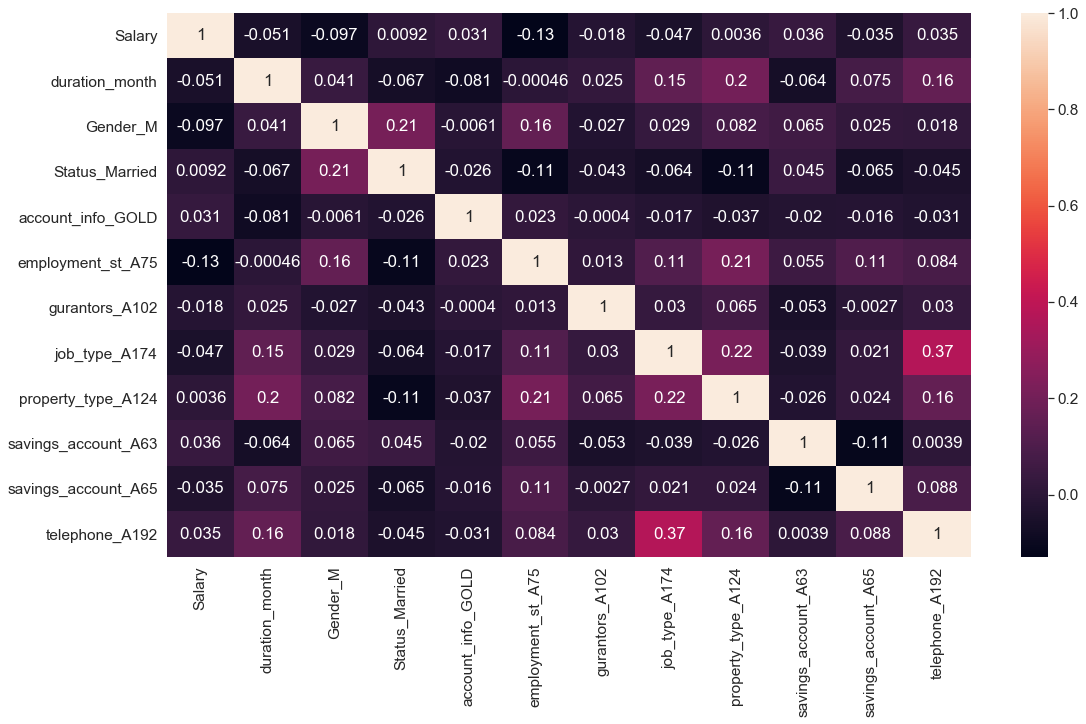

In [128]:
# Final correlation matrix of the model:

plt.figure(figsize = (18,10))  
sns.heatmap(X.corr(),annot = True)

Text(0.5, 0, 'Errors')

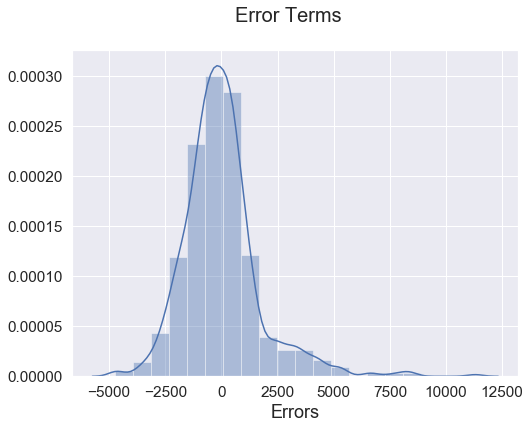

In [129]:
# Residual Analysis of the train data:

# So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear 
# regression), let us plot the histogram of the error terms and see what it looks like.

# Importing the required libraries for plots.

%matplotlib inline

y_train_predict = lr_19.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure(figsize = (8,6))
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# Inferences:

# Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled
# for our model.

In [130]:
# Making Predictions Using the Final Model:

# Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions 
# using the final, i.e. 19th model.


In [131]:
# checking train data:
train.head()

Loan  Regularity    Salary  Saving Account       age  credits_no  \
0     1           0 -0.332195       -0.670732  2.428571         1.0   
1     1           1  0.911428        0.207317 -0.785714         0.0   
2     1           0  0.652742        0.158537  1.142857         0.0   
3     1           1  0.895361        0.219512  0.857143         0.0   
4     1           0  0.394055       -0.036585  1.428571         1.0   

   duration_month  investment  liables  resident_since       ...        \
0            -1.0   -0.498072      0.0             0.5       ...         
1             2.5    0.764799      0.0            -0.5       ...         
2            -0.5    0.180540      1.0             0.0       ...         
3             2.0    0.728510      1.0             0.5       ...         
4             0.5    1.189385      1.0             0.5       ...         

   job_type_A173  job_type_A174  property_type_A122  property_type_A123  \
0              1              0                   0                   0   
1              1              0                   0                   0   
2              0              0                   0                   0   
3              1              0                   1                   0   
4              1              0                   0                   0   

   property_type_A124  savings_account_A62  savings_account_A63  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   1                    0                    0   

   savings_account_A64  savings_account_A65  telephone_A192  
0                    0                    1               1  
1                    0                    0               0  
2                    0                    0               0  
3                    0                    0               0  
4                    0                    0               0  

[5 rows x 42 columns]

In [132]:
# checking test data:
test.head()

Loan  Regularity    Salary  Saving Account       age  credit_amount  \
700     1           1 -0.105644        5.634146 -0.285714            NaN   
701     1           0 -0.387628       -0.451220  0.928571            NaN   
702     1           1 -0.067885        4.073171  1.000000            NaN   
703     1           0 -0.331392        3.304878  0.571429            NaN   
704     1           1 -0.303274       -0.475610 -0.071429            NaN   

     credits_no  duration_month  investment  liables       ...        \
700         0.0           -0.50    0.525289      0.0       ...         
701         1.0            2.50   -0.748469      0.0       ...         
702         0.0            0.50    0.695849      0.0       ...         
703         1.0            1.00   -0.494443      0.0       ...         
704         0.0            0.75   -0.367430      1.0       ...         

     job_type_A173  job_type_A174  property_type_A122  property_type_A123  \
700              0              0                   0                   1   
701              1              0                   0                   0   
702              1              0                   0                   0   
703              1              0                   1                   0   
704              1              0                   1                   0   

     property_type_A124  savings_account_A62  savings_account_A63  \
700                   0                    0                    1   
701                   1                    0                    0   
702                   1                    1                    0   
703                   0                    1                    0   
704                   0                    0                    0   

     savings_account_A64  savings_account_A65  telephone_A192  
700                    0                    0               0  
701                    0                    0               1  
702                    0                    0               1  
703                    0                    0               0  
704                    0                    0               1  

[5 rows x 43 columns]

In [133]:
X_test = test

In [134]:
X_train_lm.head()

const    Salary  duration_month  Gender_M  Status_Married  \
0    1.0 -0.332195            -1.0         1               0   
1    1.0  0.911428             2.5         0               0   
2    1.0  0.652742            -0.5         1               0   
3    1.0  0.895361             2.0         1               0   
4    1.0  0.394055             0.5         1               0   

   account_info_GOLD  employment_st_A75  gurantors_A102  job_type_A174  \
0                  0                  1               0              0   
1                  0                  0               0              0   
2                  0                  0               0              0   
3                  0                  0               0              0   
4                  0                  0               0              0   

   property_type_A124  savings_account_A63  savings_account_A65  \
0                   0                    0                    1   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   1                    0                    0   

   telephone_A192  
0               1  
1               0  
2               0  
3               0  
4               0

In [135]:
# Making predictions:

#X_train_lm = X_train_lm.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_lm.columns]
X = X_test[X.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)
X = sm.add_constant(X)

In [136]:
# Evaluate the model using the r2_score for train data:
from sklearn.metrics import r2_score

MLR_R2SCORE = round(metrics.r2_score(y_true=y_train, y_pred=y_train_predict),3)
round(metrics.r2_score(y_true=y_train, y_pred=y_train_predict),3)

0.596

In [137]:
### check this one:::
MLR_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_predict))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_predict)))

RMSE : 1730.4837654235798


In [138]:
y_pred_test = lr_19.predict(X)

y_pred_test.head()

700     241.926718
701    6511.427491
702    2766.272836
703    2949.334678
704    3065.590342
dtype: float64

In [ ]:
# Conclusions from MLR model :

# 1. R-squared value of the model is 0.596 (~59 %) data variance explained by our regression model.Also is a decent R-squared 
#    value 0.58. This means 59 % of the price value(target variable) variance is explained by the variables we have selected in
#    the model.
# 2. The R square and Adjusted R square value in model is almost same which are 0.59 and  0.58 respectively 
#    which indicates that none of the parameters in our model are reduntant. (Less than 1 % variance)
# 3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
#    predictors are statistically significant.
# 4. F-stats and Prob(F-stats) (overall model fit) - 84.54 and ~ 0 - Model fit is significant and is just 
#    not by chance.
# 5. RMSE : 1730.4837654235798 for data
# 6. The problem of multi-collinearity is taken care as we see VIF of last model is <5 and also as per the heatmap values.

## 2.2 Regression model using Ridge:


In [139]:
credit_df_ridge.head()

Gender  Loan Purpose  Regularity  Salary  Saving Account    Status  \
0      M     1     A40           0     852             0.0  Umarried   
1      F     1     A40           1    2400            72.0  Divorced   
2      M     1     A46           0    2078            68.0  Umarried   
3      M     1     A40           1    2380            73.0  Umarried   
4      M     1     A40           0    1756            52.0  Umarried   

      account_info  age  credit_amount    ...      gurantors  housing_type  \
0           BRONZE   67         1169.0    ...           A101          A152   
1           SILVER   22         5951.0    ...           A101          A152   
2  DEFAULT_MISSING   49         2096.0    ...           A101          A152   
3           BRONZE   45         7882.0    ...           A103          A153   
4           BRONZE   53         4870.0    ...           A101          A153   

  installment_type investment job_type liables property_type  resident_since  \
0             A143  34.080002     A173       1          A121               4   
1             A143  48.000000     A173       1          A121               2   
2             A143  41.560001     A172       2          A121               3   
3             A143  47.599998     A173       2          A122               4   
4             A143  52.680000     A173       2          A124               4   

  savings_account  telephone  
0             A65       A192  
1             A61       A191  
2             A61       A191  
3             A61       A191  
4             A61       A191  

[5 rows x 24 columns]

In [140]:
# Dividing data into X and y variables for model building:

y = credit_df_ridge.pop('credit_amount')
X = credit_df_ridge

In [141]:
# creating dummy variables for categorical variables

# subset all categorical variables
credit_categorical = X.select_dtypes(include=['object'])
credit_categorical.head()


Gender Purpose    Status     account_info employment_st foreigner gurantors  \
0      M     A40  Umarried           BRONZE           A75      A201      A101   
1      F     A40  Divorced           SILVER           A73      A201      A101   
2      M     A46  Umarried  DEFAULT_MISSING           A74      A201      A101   
3      M     A40  Umarried           BRONZE           A74      A201      A103   
4      M     A40  Umarried           BRONZE           A73      A201      A101   

  housing_type installment_type job_type property_type savings_account  \
0         A152             A143     A173          A121             A65   
1         A152             A143     A173          A121             A61   
2         A152             A143     A172          A121             A61   
3         A153             A143     A173          A122             A61   
4         A153             A143     A173          A124             A61   

  telephone  
0      A192  
1      A191  
2      A191  
3      A191  
4      A191

In [142]:
# convert into dummies :
credit_dummies = pd.get_dummies(credit_categorical, drop_first=True)
credit_dummies.head()

Gender_M  Purpose_A410  Purpose_A46  Purpose_A48  Purpose_A49  \
0         1             0            0            0            0   
1         0             0            0            0            0   
2         1             0            1            0            0   
3         1             0            0            0            0   
4         1             0            0            0            0   

   Status_Married  Status_Umarried  account_info_DEFAULT_MISSING  \
0               0                1                             0   
1               0                0                             0   
2               0                1                             1   
3               0                1                             0   
4               0                1                             0   

   account_info_GOLD  account_info_SILVER       ...        job_type_A173  \
0                  0                    0       ...                    1   
1                  0                    1       ...                    1   
2                  0                    0       ...                    0   
3                  0                    0       ...                    1   
4                  0                    0       ...                    1   

   job_type_A174  property_type_A122  property_type_A123  property_type_A124  \
0              0                   0                   0                   0   
1              0                   0                   0                   0   
2              0                   0                   0                   0   
3              0                   1                   0                   0   
4              0                   0                   0                   1   

   savings_account_A62  savings_account_A63  savings_account_A64  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   savings_account_A65  telephone_A192  
0                    1               1  
1                    0               0  
2                    0               0  
3                    0               0  
4                    0               0  

[5 rows x 32 columns]

In [143]:
# drop categorical variables :
X = X.drop(list(credit_categorical.columns), axis=1)

In [144]:
# concat dummy variables with X :
X = pd.concat([X, credit_dummies], axis=1)

In [145]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Loan', 'Regularity', 'Salary', 'Saving Account', 'age', 'credits_no',
       'duration_month', 'investment', 'liables', 'resident_since', 'Gender_M',
       'Purpose_A410', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'Status_Married', 'Status_Umarried', 'account_info_DEFAULT_MISSING',
       'account_info_GOLD', 'account_info_SILVER', 'employment_st_A72',
       'employment_st_A73', 'employment_st_A74', 'employment_st_A75',
       'foreigner_A202', 'gurantors_A102', 'gurantors_A103',
       'housing_type_A152', 'housing_type_A153', 'installment_type_A142',
       'installment_type_A143', 'job_type_A172', 'job_type_A173',
       'job_type_A174', 'property_type_A122', 'property_type_A123',
       'property_type_A124', 'savings_account_A62', 'savings_account_A63',
       'savings_account_A64', 'savings_account_A65', 'telephone_A192'],
      dtype='object')

In [146]:
X_train = X[:ntrain]
X_test = X[ntrain:]

# Check if we need this

In [147]:
X_train.shape

(700, 42)

In [148]:
y_train_initial.shape

(700,)

In [149]:
X_test.shape

(300, 42)

In [150]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train_initial) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [151]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.056978      0.109966         0.001002        0.000008      0.0001   
1       0.002592      0.001197         0.000799        0.000399       0.001   
2       0.002203      0.000418         0.000000        0.000000        0.01   
3       0.000798      0.000747         0.000435        0.000536        0.05   
4       0.003132      0.006263         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}       -1482.441110       -1369.521666       -1366.708160   
1   {'alpha': 0.001}       -1482.441153       -1369.518628       -1366.708060   
2    {'alpha': 0.01}       -1482.441585       -1369.488273       -1366.707059   
3    {'alpha': 0.05}       -1482.443497       -1369.353827       -1366.702595   
4     {'alpha': 0.1}       -1482.445875       -1369.186826       -1366.696979   

   split3_test_score       ...         mean_test_score  std_test_score  \
0       -1079.454103       ...            -1291.241732      148.973295   
1       -1079.452992       ...            -1291.240859      148.973322   
2       -1079.441883       ...            -1291.232125      148.973593   
3       -1079.392558       ...            -1291.193397      148.974848   
4       -1079.331013       ...            -1291.145183      148.976538   

   rank_test_score  split0_train_score  split1_train_score  \
0               26        -1132.612482        -1162.954792   
1               25        -1132.612227        -1162.954564   
2               24        -1132.609679        -1162.952294   
3               23        -1132.598341        -1162.942204   
4               22        -1132.584145        -1162.929601   

   split2_train_score  split3_train_score  split4_train_score  \
0        -1162.085249        -1243.843876        -1221.357209   
1        -1162.084957        -1243.843576        -1221.356881   
2        -1162.082042        -1243.840577        -1221.353602   
3        -1162.069077        -1243.827257        -1221.339047   
4        -1162.052860        -1243.810632        -1221.320895   

   mean_train_score  std_train_score  
0      -1184.570722        41.325673  
1      -1184.570441        41.325648  
2      -1184.567639        41.325399  
3      -1184.555185        41.324304  
4      -1184.539627        41.322957  

[5 rows x 21 columns]

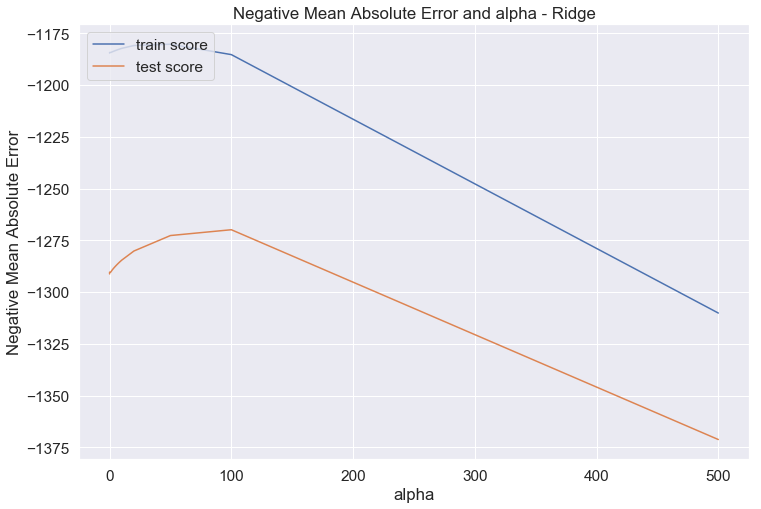

In [152]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(12, 8))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha - Ridge")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [153]:
# model with optimal alpha:

# Ridge regression:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train_initial)

# predict
y_train_pred = ridge.predict(X_train)
RIDGE_R2SCORE = metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.6001524670636948


In [154]:
RIDGE_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 1722.0833068104073


In [155]:
# Ridge model parameters:

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Below variables are choosen by Ridge with the correspondage weightage as below:")
list(zip(cols, model_parameters))

Below variables are choosen by Ridge with the correspondage weightage as below:


[('constant', 3207.093),
 ('Loan', -134.127),
 ('Regularity', -54.648),
 ('Salary', 719.395),
 ('Saving Account', -4.524),
 ('age', -7.506),
 ('credits_no', 43.481),
 ('duration_month', 1294.647),
 ('investment', -24.443),
 ('liables', -69.815),
 ('resident_since', -41.75),
 ('Gender_M', 124.312),
 ('Purpose_A410', 49.287),
 ('Purpose_A46', -30.188),
 ('Purpose_A48', -27.8),
 ('Purpose_A49', 35.819),
 ('Status_Married', -148.795),
 ('Status_Umarried', 172.601),
 ('account_info_DEFAULT_MISSING', 31.24),
 ('account_info_GOLD', -116.323),
 ('account_info_SILVER', 101.92),
 ('employment_st_A72', 91.847),
 ('employment_st_A73', 30.92),
 ('employment_st_A74', -2.424),
 ('employment_st_A75', -89.599),
 ('foreigner_A202', -0.139),
 ('gurantors_A102', 154.967),
 ('gurantors_A103', -59.187),
 ('housing_type_A152', -115.893),
 ('housing_type_A153', 39.94),
 ('installment_type_A142', -2.635),
 ('installment_type_A143', 33.188),
 ('job_type_A172', -35.275),
 ('job_type_A173', -101.902),
 ('job_type

## 2.3 Regression model using Lasso :

In [156]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train_initial) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [163]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=0.01]
cv_results_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.046651  7.221601e-02         0.003915    5.832577e-03      0.0001   
1       0.007180  1.465889e-03         0.001197    3.980880e-04       0.001   
2       0.005983  9.246216e-07         0.000998    3.371748e-07        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.526362           0.381711           0.569119   
1   {'alpha': 0.001}           0.526363           0.381716           0.569119   
2    {'alpha': 0.01}           0.526368           0.381762           0.569124   

   split3_test_score       ...         mean_test_score  std_test_score  \
0           0.594675       ...                0.536475        0.082447   
1           0.594676       ...                0.536477        0.082446   
2           0.594683       ...                0.536491        0.082431   

   rank_test_score  split0_train_score  split1_train_score  \
0               26            0.620597            0.643148   
1               25            0.620597            0.643148   
2               24            0.620597            0.643148   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.607809            0.602511            0.600428   
1            0.607809            0.602511            0.600428   
2            0.607809            0.602511            0.600428   

   mean_train_score  std_train_score  
0          0.614899         0.015771  
1          0.614899         0.015771  
2          0.614899         0.015771  

[3 rows x 21 columns]

In [164]:
# plotting mean test and train scoes with alpha 
#cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(12, 8))
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha- Lasso")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [165]:
# model with optimal alpha:

# lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train_initial)

# predict
y_train_pred = lasso.predict(X_train)
LASSO_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.6081227820222617


In [166]:
LASSO_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 1704.833436945463


In [167]:
# lasso model parameters:

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print("Below variables are choosen by Lasso with the correspondage weightage as below:")
list(zip(cols, model_parameters))

Below variables are choosen by Lasso with the correspondage weightage as below:


[('constant', 3210.048),
 ('Loan', -140.394),
 ('Regularity', -51.556),
 ('Salary', 840.561),
 ('Saving Account', -28.462),
 ('age', 22.823),
 ('credits_no', 59.827),
 ('duration_month', 1496.609),
 ('investment', -41.3),
 ('liables', -95.178),
 ('resident_since', -53.763),
 ('Gender_M', 159.451),
 ('Purpose_A410', 40.177),
 ('Purpose_A46', -24.729),
 ('Purpose_A48', -16.609),
 ('Purpose_A49', 2.346),
 ('Status_Married', -166.98),
 ('Status_Umarried', 173.617),
 ('account_info_DEFAULT_MISSING', 52.28),
 ('account_info_GOLD', -110.129),
 ('account_info_SILVER', 103.899),
 ('employment_st_A72', 50.213),
 ('employment_st_A73', -33.783),
 ('employment_st_A74', -66.043),
 ('employment_st_A75', -157.491),
 ('foreigner_A202', 18.253),
 ('gurantors_A102', 170.59),
 ('gurantors_A103', -63.236),
 ('housing_type_A152', -138.683),
 ('housing_type_A153', -35.758),
 ('installment_type_A142', -13.589),
 ('installment_type_A143', 51.408),
 ('job_type_A172', 205.686),
 ('job_type_A173', 161.353),
 ('jo

## 2.4 Regression model using ElasticNet :


In [168]:
elastic = ElasticNet()
# cross validation

# defining the model parameters for elasticnet:

#'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]

parametersGrid = {'alpha': [0.0001, 0.001,0.002, 0.005, 0.01,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 10, 100,200,500],
                   'l1_ratio':[0.01,0.1,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.98]}

model_cv = GridSearchCV(estimator=elastic, 
                        param_grid= parametersGrid,
                        scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train_initial) 

Fitting 5 folds for each of 170 candidates, totalling 850 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 850 out of 850 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 10, 100, 200, 500], 'l1_ratio': [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.98]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [169]:
cv_results_elastic = pd.DataFrame(model_cv.cv_results_)
cv_results_elastic.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.012365      0.001197         0.000999    6.641573e-07      0.0001   
1       0.010970      0.003278         0.000798    3.989225e-04      0.0001   
2       0.006608      0.003325         0.000399    4.888112e-04      0.0001   
3       0.010905      0.002631         0.000997    6.298470e-04      0.0001   
4       0.008581      0.001195         0.000794    3.971627e-04      0.0001   

  param_l1_ratio                               params  split0_test_score  \
0           0.01  {'alpha': 0.0001, 'l1_ratio': 0.01}      -4.460108e+06   
1            0.1   {'alpha': 0.0001, 'l1_ratio': 0.1}      -4.460104e+06   
2            0.5   {'alpha': 0.0001, 'l1_ratio': 0.5}      -4.460087e+06   
3            0.6   {'alpha': 0.0001, 'l1_ratio': 0.6}      -4.460083e+06   
4            0.7   {'alpha': 0.0001, 'l1_ratio': 0.7}      -4.460079e+06   

   split1_test_score  split2_test_score       ...         mean_test_score  \
0      -4.127088e+06      -3.973531e+06       ...           -3.403933e+06   
1      -4.127230e+06      -3.973526e+06       ...           -3.403963e+06   
2      -4.127862e+06      -3.973504e+06       ...           -3.404097e+06   
3      -4.128020e+06      -3.973498e+06       ...           -3.404131e+06   
4      -4.128178e+06      -3.973493e+06       ...           -3.404164e+06   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0   987631.001277               92       -2.603013e+06       -2.708201e+06   
1   987646.152767               93       -2.603013e+06       -2.708201e+06   
2   987713.762121               96       -2.603013e+06       -2.708201e+06   
3   987730.733485               99       -2.603013e+06       -2.708200e+06   
4   987747.732524              100       -2.603013e+06       -2.708200e+06   

   split2_train_score  split3_train_score  split4_train_score  \
0       -2.720843e+06       -3.181856e+06       -3.060403e+06   
1       -2.720843e+06       -3.181856e+06       -3.060403e+06   
2       -2.720843e+06       -3.181856e+06       -3.060403e+06   
3       -2.720843e+06       -3.181856e+06       -3.060403e+06   
4       -2.720843e+06       -3.181856e+06       -3.060403e+06   

   mean_train_score  std_train_score  
0     -2.854863e+06    224530.830215  
1     -2.854863e+06    224530.845257  
2     -2.854863e+06    224530.894969  
3     -2.854863e+06    224530.902999  
4     -2.854863e+06    224530.909261  

[5 rows x 22 columns]

In [353]:
model_cv.best_params_

{'alpha': 0.8, 'l1_ratio': 0.9}

In [170]:
cv_results_elastic2 = cv_results_elastic.join(pd.DataFrame(cv_results_elastic.pop('params').tolist()))
cv_results_elastic2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_l1_ratio', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score', 'alpha', 'l1_ratio'],
      dtype='object')

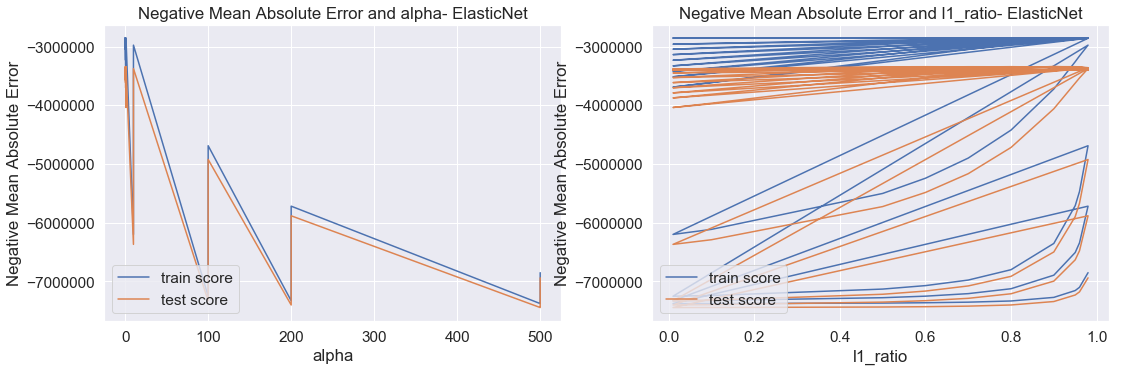

In [171]:
# Plotting the results:


# plotting
plt.figure(figsize=(18, 12))

plt.subplot(2,2,1)
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')


plt.subplot(2,2,2)
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_test_score'])
plt.xlabel('l1_ratio')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and l1_ratio- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')

plt.show()

In [172]:
#cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=0.02]

cv_results_elastic2 = cv_results_elastic2[cv_results_elastic2['param_alpha']<=0.8]
cv_results_elastic2 = cv_results_elastic2[cv_results_elastic2['param_l1_ratio']<=0.9]


# plotting
plt.figure(figsize=(18, 12))

plt.subplot(2,2,1)
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_alpha'], cv_results_elastic2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')


plt.subplot(2,2,2)
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_train_score'])
plt.plot(cv_results_elastic2['param_l1_ratio'], cv_results_elastic2['mean_test_score'])
plt.xlabel('l1_ratio')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and l1_ratio- ElasticNet")
plt.legend(['train score', 'test score'], loc='lower left')

plt.show()

In [173]:
# model with optimal hyper params value:

elastic = ElasticNet(alpha=0.001, l1_ratio=0.9998)  
elastic.fit(X_train, y_train_initial)

# predict
y_train_pred = elastic.predict(X_train)
ELASTIC_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.6081227857151374


In [174]:
ELASTIC_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 1704.8334289126685


## 2.5 Regression model using XGBoosting:

In [175]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [176]:
XGB_model = XGBRegressor(n_estimators=1500,learning_rate=0.05,
 objective= 'reg:squarederror')
XGB_model.fit(X_train, y_train_initial, 
             eval_set=[(X_train, y_train_initial)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [178]:
# model with optimal hyper params value:

#elastic = ElasticNet(alpha=0.001, l1_ratio=0.4)  
XGB_model.fit(X_train, y_train_initial)

# predict
y_train_pred = XGB_model.predict(X_train)
XGB_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.9772893352156055


In [179]:
XGB_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 410.41371938072587


# 2.6 Regression Model Using AdaBoost:

In [180]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=1000)
print(ada_reg)
AdaBoostRegressor(base_estimator=None, learning_rate=0.1,
         n_estimators=100, random_state=None) 


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=1000, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=100, random_state=None)

In [181]:
ada_reg.fit(X_train, y_train_initial)

# predict
y_train_pred = ada_reg.predict(X_train)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))


0.5892437795237022


In [182]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 1745.4162744135795


In [183]:
# Hyper parameter tuning :
ada=AdaBoostRegressor()
crossvalidation = 5
search_grid={'n_estimators':[100,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [184]:
search.fit(X_train, y_train_initial)
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 1}

In [185]:
ada_reg2=AdaBoostRegressor(n_estimators=100,learning_rate=0.1,random_state=1)
score=np.mean(cross_val_score(ada_reg2,X_train, y_train_initial,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score

-3662679.2910518474

In [186]:
ada_reg2.fit(X_train, y_train_initial)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=100, random_state=1)

In [187]:
ADA_R2SCORE= metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train_initial, y_pred=y_train_pred))

0.5892437795237022


In [188]:
ADA_RMSE = np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train_initial, y_train_pred)))

RMSE : 1745.4162744135795


# 2.7 Preparing ensemble of models :


## 2.7.1 Using weighted average method :

In [194]:
# Model 1:

XGB_model.fit(X_train, y_train_initial)
elastic.fit(X_train, y_train_initial)
lasso.fit(X_train, y_train_initial)


pred1=XGB_model.predict(X_test)
pred2=elastic.predict(X_test)
pred3=lasso.predict(X_test)

finalpred1=(pred1*0.2+pred2*0.2+pred3*0.3)

In [196]:
# Model 2:

XGB_model.fit(X_train, y_train_initial)
#elastic.fit(X_train, y_train_initial)
lasso.fit(X_train, y_train_initial)


pred1=XGB_model.predict(X_test)
#pred2=elastic.predict(X_test)
pred3=lasso.predict(X_test)

finalpred2=(pred1*0.4+pred3*0.6)

In [209]:
# Model 3:

XGB_model.fit(X_train, y_train_initial)
lasso.fit(X_train, y_train_initial)

pred1=XGB_model.predict(X_test)
pred3=lasso.predict(X_test)

finalpred3=(pred1*0.38+pred3*0.62)



## Comparision of performance of various models:

We will evaluate the model performance based on the RMSE and R2 score for each model:
Mutiple Linear Regression Model, Ridge, Lasso, ElasticNet Model

In [212]:
data_model = [
     {'Model_Type': 'MLR','RMSE': MLR_RMSE ,'R2_SCORE': MLR_R2SCORE },
     {'Model_Type': 'Ridge', 'RMSE': RIDGE_RMSE, 'R2_SCORE': RIDGE_R2SCORE},
     {'Model_Type': 'Lasso', 'RMSE': LASSO_RMSE, 'R2_SCORE': LASSO_R2SCORE},
     {'Model_Type': 'Elastic', 'RMSE': ELASTIC_RMSE, 'R2_SCORE': ELASTIC_R2SCORE},
     {'Model_Type': 'XGB', 'RMSE': XGB_RMSE, 'R2_SCORE': XGB_R2SCORE},
     {'Model_Type': 'ADABoost', 'RMSE': ADA_RMSE, 'R2_SCORE': ADA_R2SCORE}]

model_score = pd.DataFrame(data_model, columns=['Model_Type', 'RMSE', 'R2_SCORE'])

model_score.head()

Model_Type         RMSE  R2_SCORE
0        MLR  1730.483765  0.596000
1      Ridge  1722.083307  0.600152
2      Lasso  1704.833437  0.608123
3    Elastic  1704.833429  0.608123
4        XGB   410.413719  0.977289

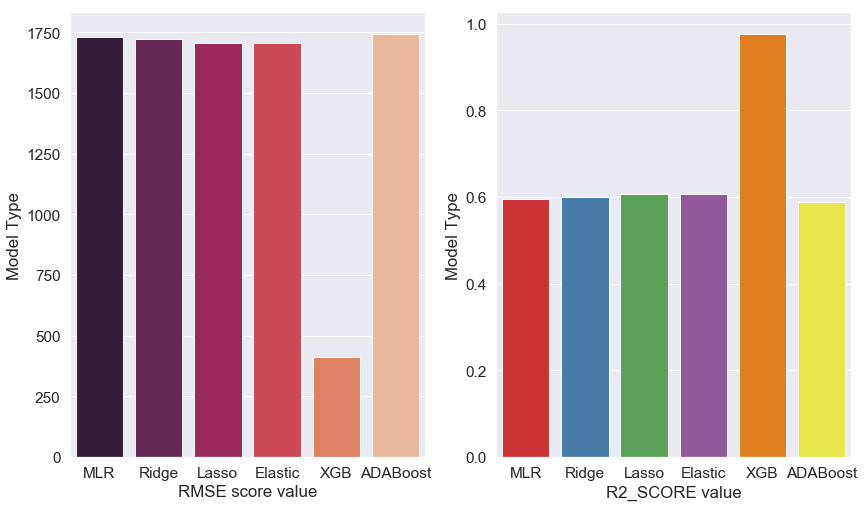

In [214]:
# let's visualise this model performance in terms of RMSE:

#setting up the figure size for larger picture of the plot:
plt.figure(num=None,figsize=(14,18),facecolor='w',edgecolor='k')
plt.title("Performance Comparision of various models for Credit Amount Prediction")

#Plotting the bar plot for data using matplotlin and seaborn, and specifying required title, x and y axis labels:
plt.subplot(2,2,1)
sns.barplot(data=model_score,x='Model_Type',y='RMSE',palette="rocket")
plt.ylabel("Model Type")
plt.xlabel("RMSE score value")

plt.subplot(2,2,2)
sns.barplot(data=model_score,x='Model_Type',y='R2_SCORE',palette="Set1")
plt.ylabel("Model Type")
plt.xlabel("R2_SCORE value")

plt.show()

In [215]:
# Let's sort the model based on best RMSE which is the evaluation criteria for the competition:

model_score.sort_values(by=['RMSE'], ascending=True)

Model_Type         RMSE  R2_SCORE
4        XGB   410.413719  0.977289
3    Elastic  1704.833429  0.608123
2      Lasso  1704.833437  0.608123
1      Ridge  1722.083307  0.600152
0        MLR  1730.483765  0.596000
5   ADABoost  1745.416274  0.589244

In [216]:
# Inference : Since the best two performing model in terms of RMSE is XGB and Lasso , so these are selected.

# Step 3: Submission :

In [417]:
# Let's make some predictions and submit it, finally:

#y_test_pred = ada_reg2.predict(X_test)

#submission_elastic = pd.DataFrame()
#submission_elastic['S.no'] = test_ID
#submission_elastic['credit_amount'] = y_test_pred 

#submission_elastic['credit_amount'] = np.expm1(submission_elastic['credit_amount']) 

#submission_elastic.to_csv('Ada1.csv',index=False)


In [207]:
# Submission for ensemble models:
y_test_pred = finalpred3

submission_elastic = pd.DataFrame()
submission_elastic['S.no'] = test_ID
submission_elastic['credit_amount'] = y_test_pred 

#submission_elastic['credit_amount'] = np.expm1(submission_elastic['credit_amount']) 

submission_elastic.to_csv('EnsemblePredictionsFinal.csv',index=False)


# INFERENCE:

Below are the top 10 variables which affects the credit amount as per the above models:
(Please refer the excel file attached to understand how these variables are picked up )

duration_month      , +ve
Salary              , +ve 
job_type_A174       , +ve
gurantors_A102      , +ve
Status_Married      , -ve
property_type_A124  , +ve
telephone_A192      , +ve
Gender_M            , +ve
Status_Umarried     , +ve
Loan                , -ve

So, here +ve and -ve represents if these variables are directly or inversely proportional to the target variable credit amount.

*_The factors such as loan duration, salary , job type of applicant as highly qualified employee or officer, presence of guarantor during credit application , applicant having phone registered to his name, applicant being male in gender, unmarried applicants influences the credit amount positively i.e. an applicant with these features are likely to get higher credit amount from the financial institution.
On the other hand if applicant is married and is already having loan etc , then it is expected that lower credit amount will be given to such applicants._*






The evaluation Criteria for this coding event is RMSE.
XGBoosting and Lasso outperforms other models in terms of RMSE score , hence an ensemble of these two models are used with their optimised weighted average for the prediction 

An accuracy of 97.94 % was achieved for this event and current ranking of 18 in the leaderboard.

In [ ]:
####################################### END OF CODE, Thanks for your time ##############################